In [1]:
conda install scanpy


Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/denverncube/opt/anaconda3

  added / updated specs:
    - scanpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anndata-0.8.0              |     pyhd8ed1ab_1          74 KB  conda-forge
    natsort-8.2.0              |     pyhd8ed1ab_0          36 KB  conda-forge
    pynndescent-0.5.8          |     pyh1a96a4e_0          47 KB  conda-forge
    scanpy-1.9.1               |     pyhd8ed1ab_0         1.9 MB  conda-forge
    session-info-1.0.0         |     pyhd8ed1ab_0          12 KB  conda-forge
    stdlib-list-0.8.0          |     pyhd8ed1ab_0          28 KB  conda-forge
    umap-learn-0.5.3           |   py39h6e9494a_0         132 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2

In [2]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

In [3]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 pynndescent==0.5.8


In [5]:
pbmc = sc.datasets.pbmc68k_reduced()
# inspect pbmc contents
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

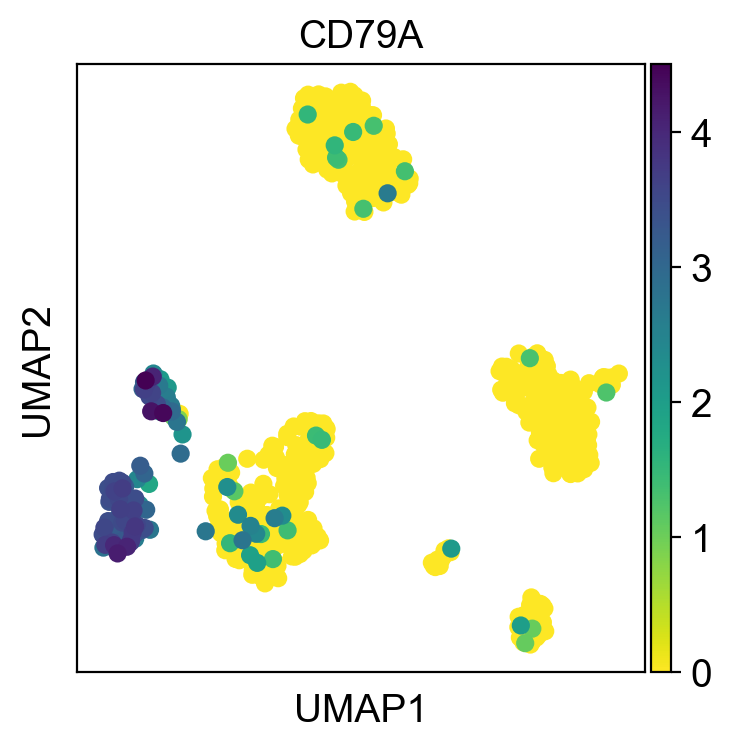

In [6]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(pbmc, color='CD79A')

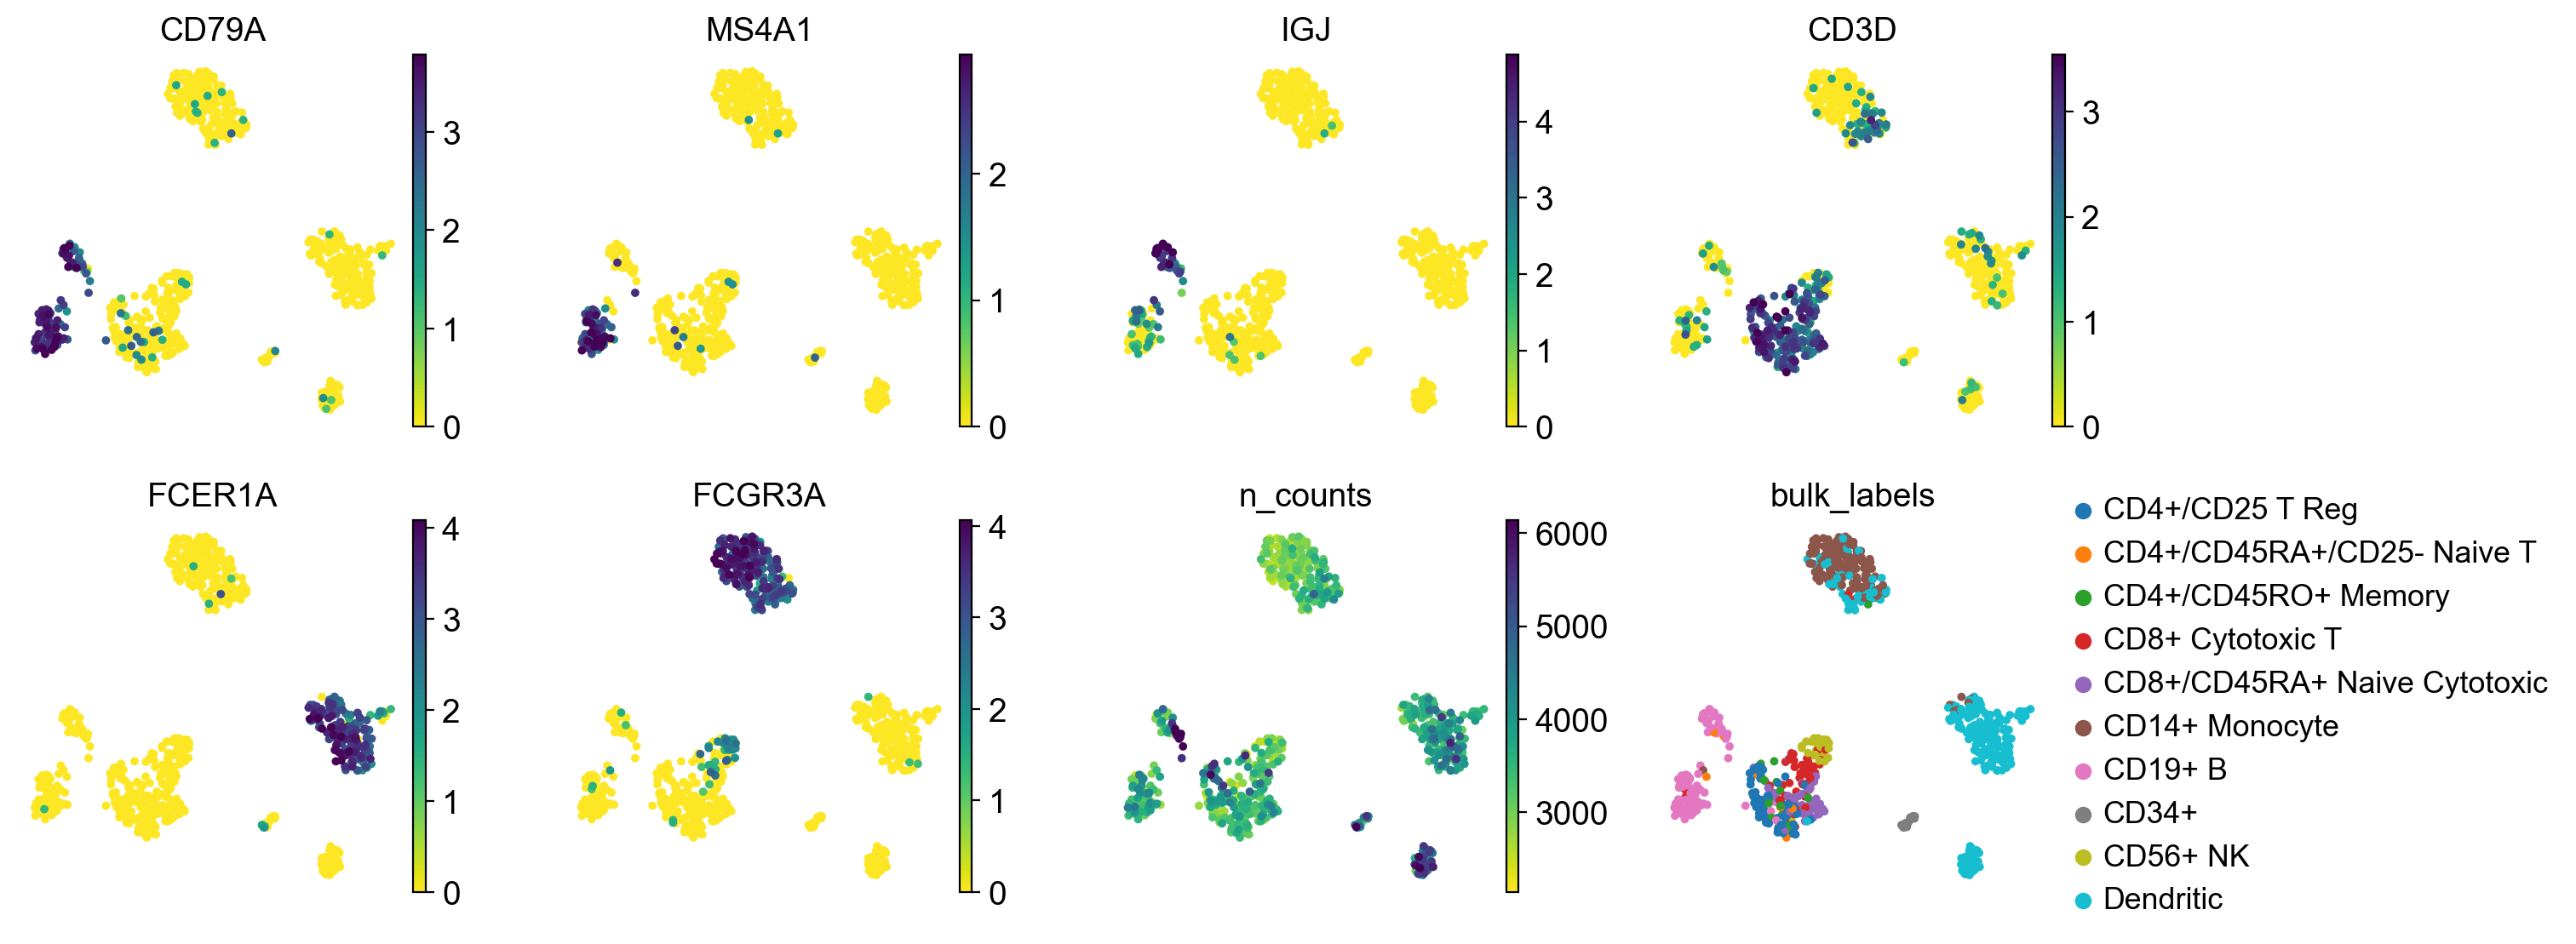

In [7]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'IGJ', 'CD3D', 'FCER1A', 'FCGR3A', 'n_counts', 'bulk_labels'], s=50, frameon=False, ncols=4, vmax='p99')

In [13]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

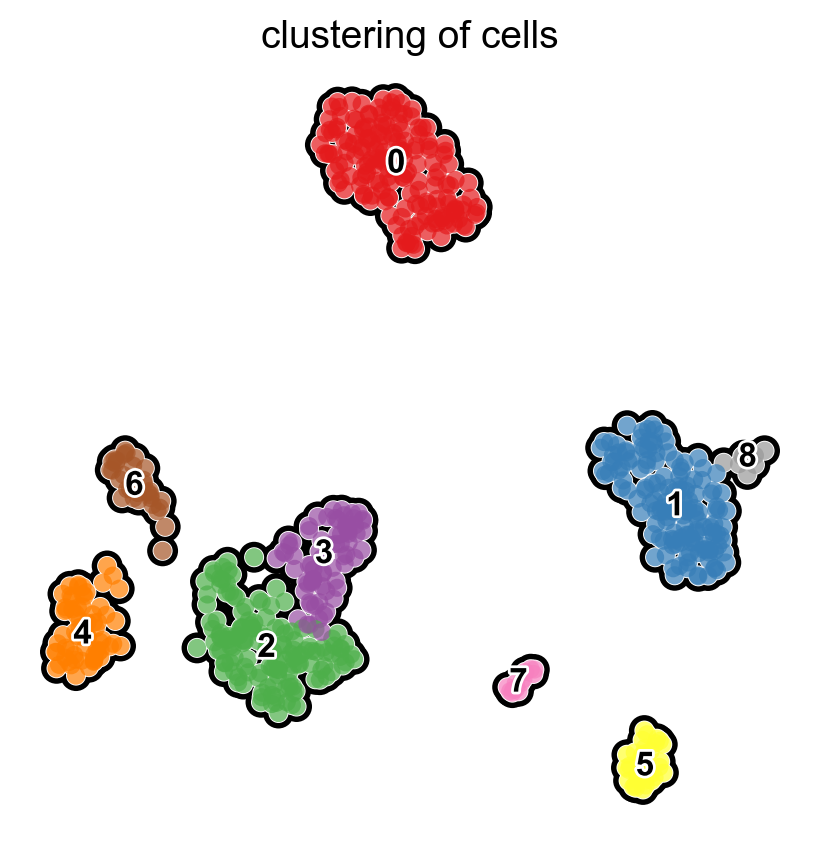

In [14]:


with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [11]:
#conda install leidenalg

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/denverncube/opt/anaconda3

  added / updated specs:
    - leidenalg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arpack-3.7.0               |       hefb7bc6_2         195 KB  conda-forge
    glpk-5.0                   |       h3cb5acd_0         1.0 MB  conda-forge
    igraph-0.10.2              |       h6560ca6_0         1.5 MB  conda-forge
    leidenalg-0.9.1            |   py39h7a8716b_0         128 KB  conda-forge
    libblas-3.9.0              |     12_osx64_mkl          12 KB  conda-forge
    liblapack-3.9.0            |     12_osx64_mkl          12 KB  conda-forge
    metis-5.1.0                |    h2e338ed_10

In [15]:
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


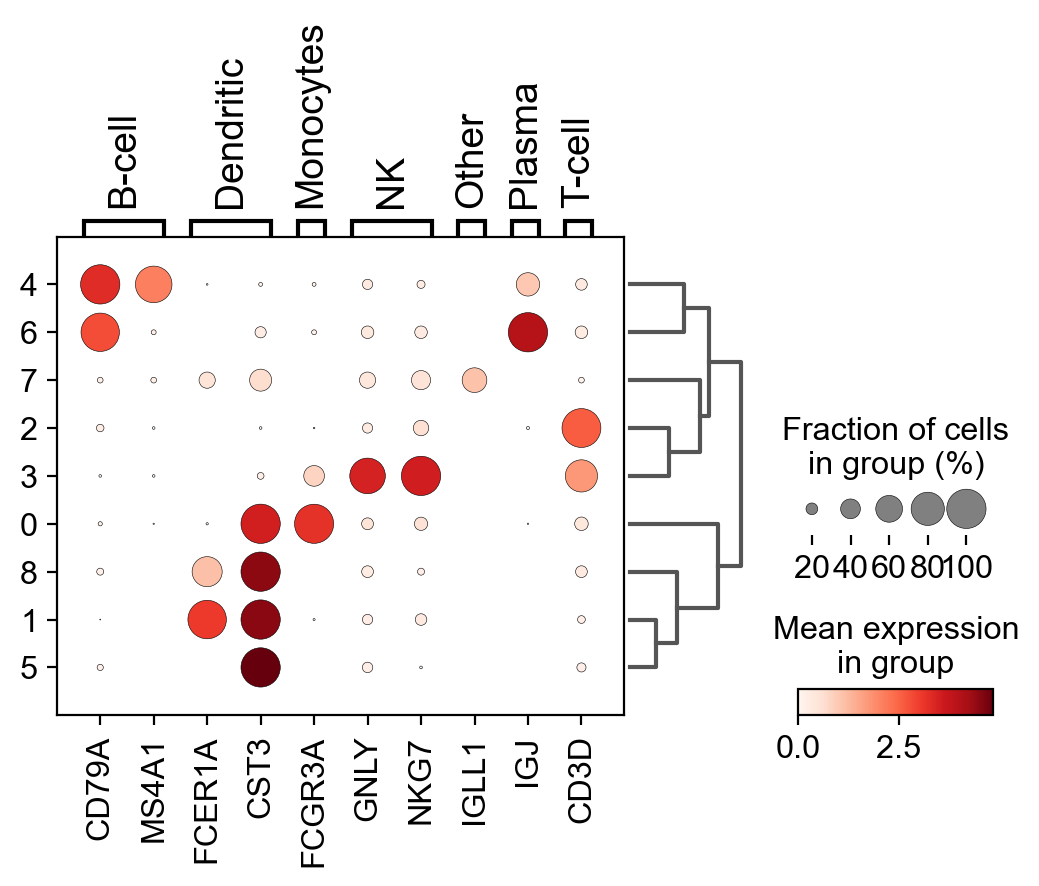

In [39]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)


In [17]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Monocytes',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'B-cell',
     '5': 'Dendritic',
     '6': 'Plasma',
     '7': 'Other',
     '8': 'Dendritic',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

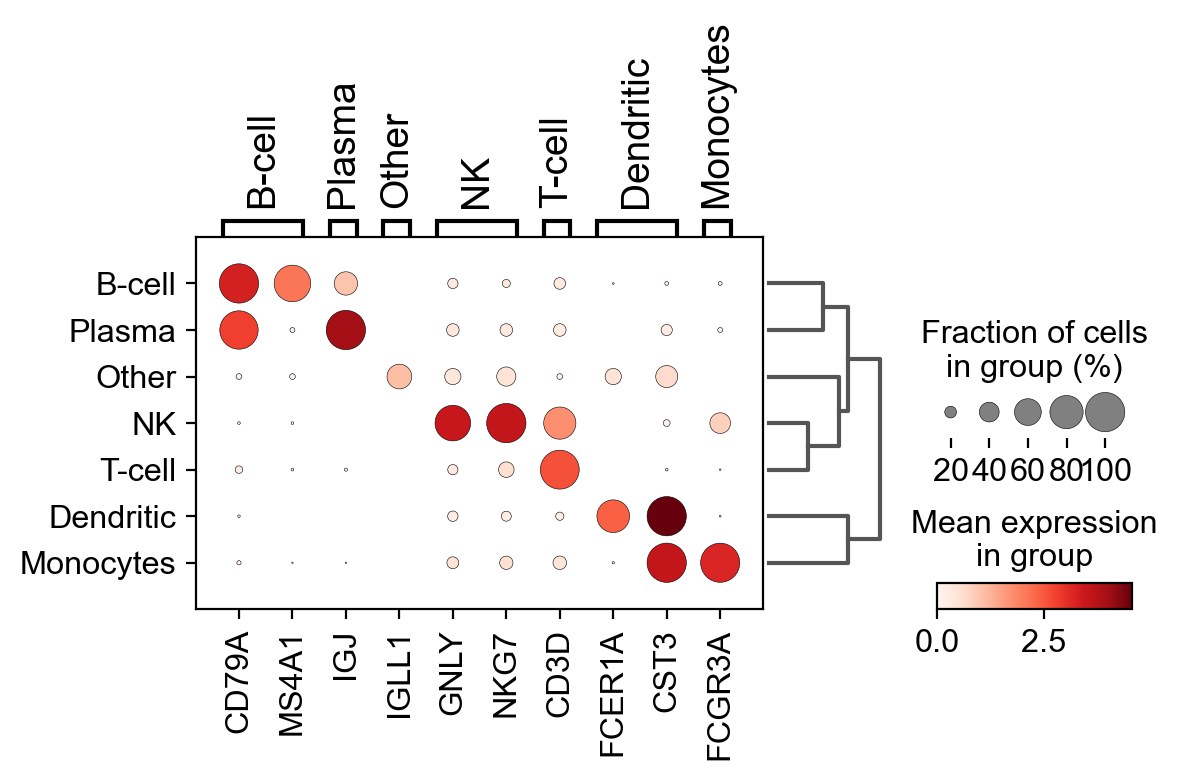

In [20]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'cell type', dendrogram=True)


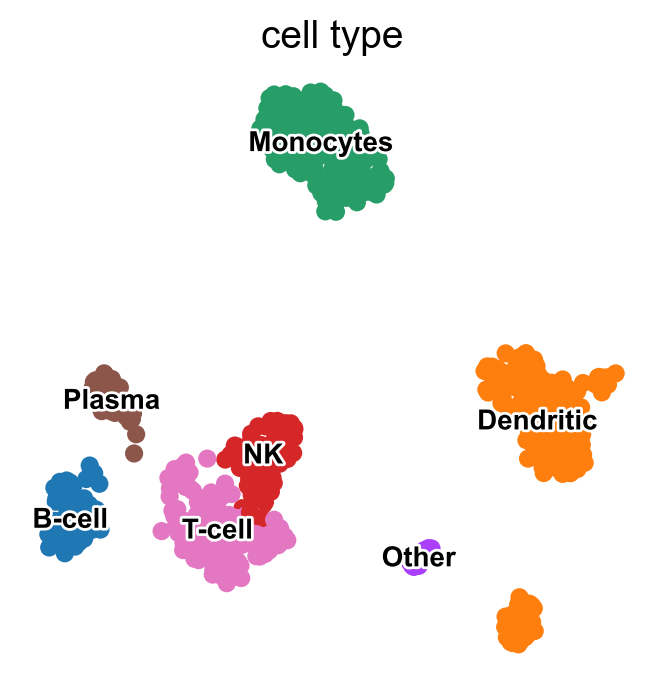

In [22]:
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

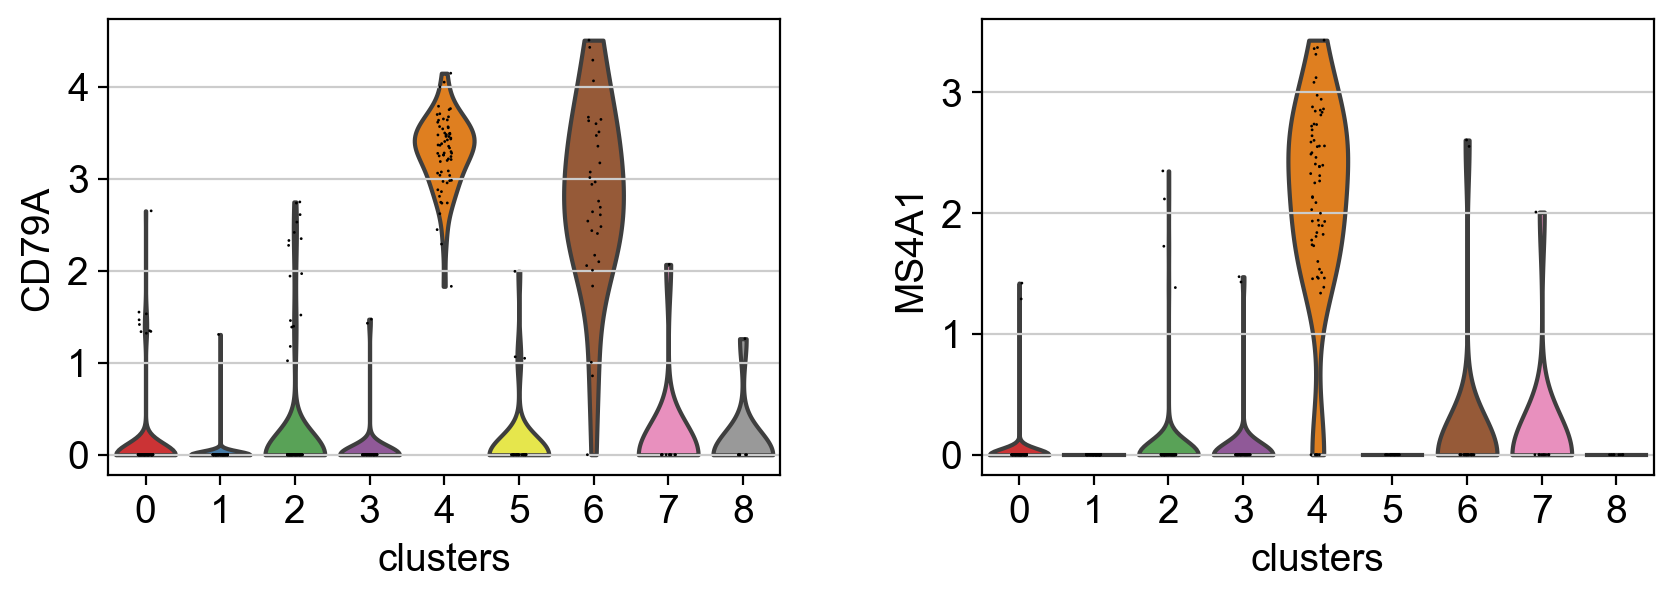

In [23]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(pbmc, ['CD79A', 'MS4A1'], groupby='clusters' )

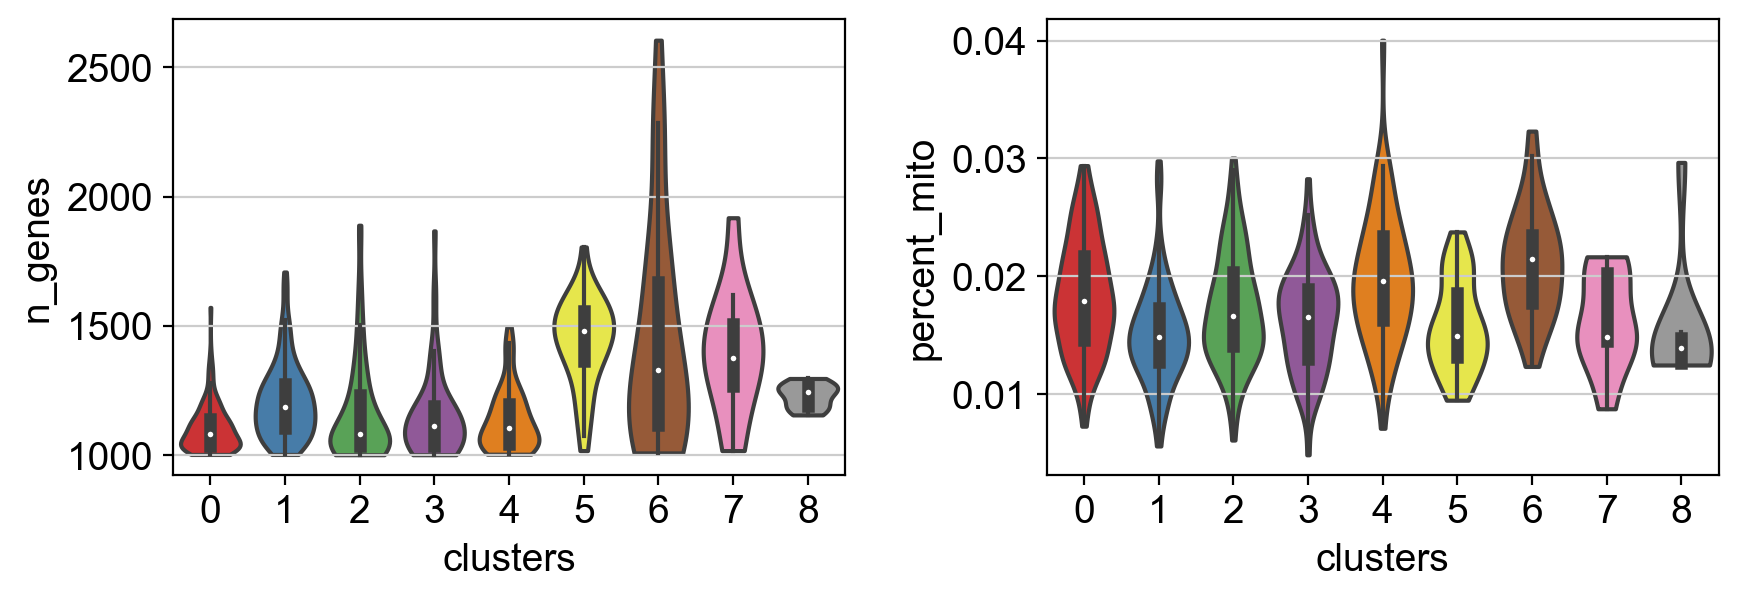

In [24]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(pbmc, ['n_genes', 'percent_mito'], groupby='clusters', stripplot=False, inner='box')  # use stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


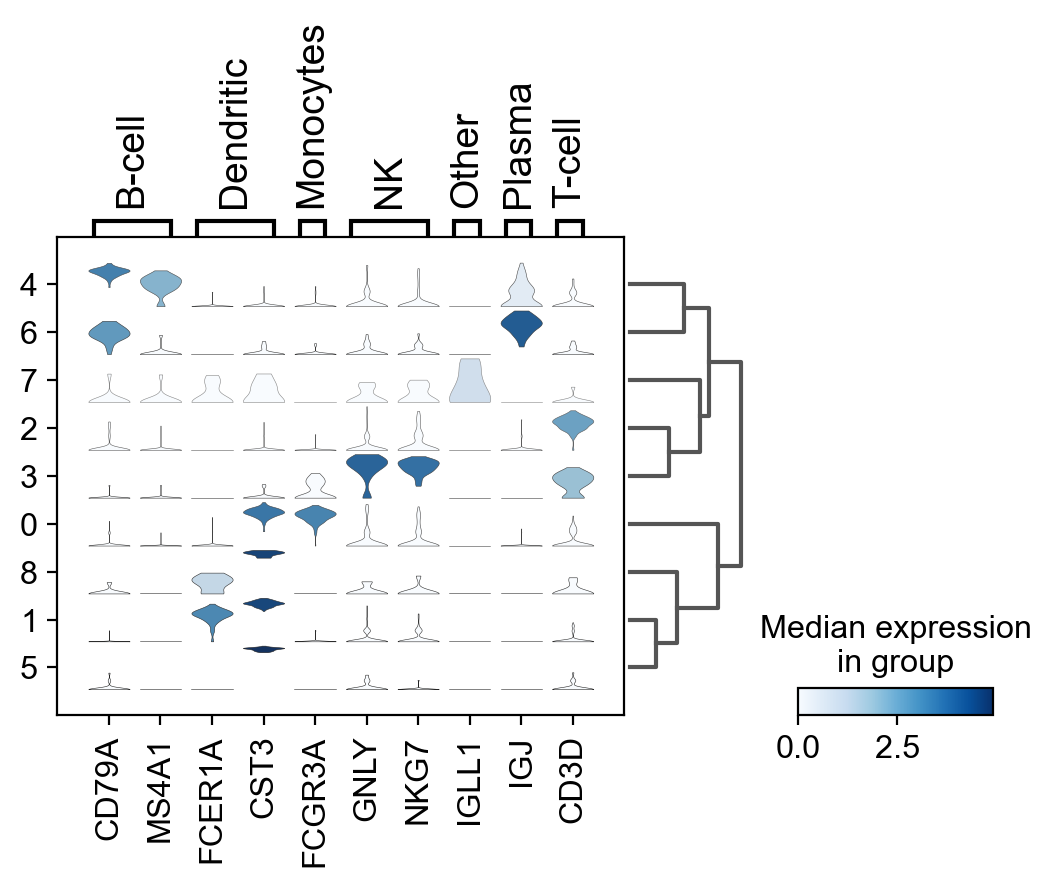

In [25]:
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)


categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


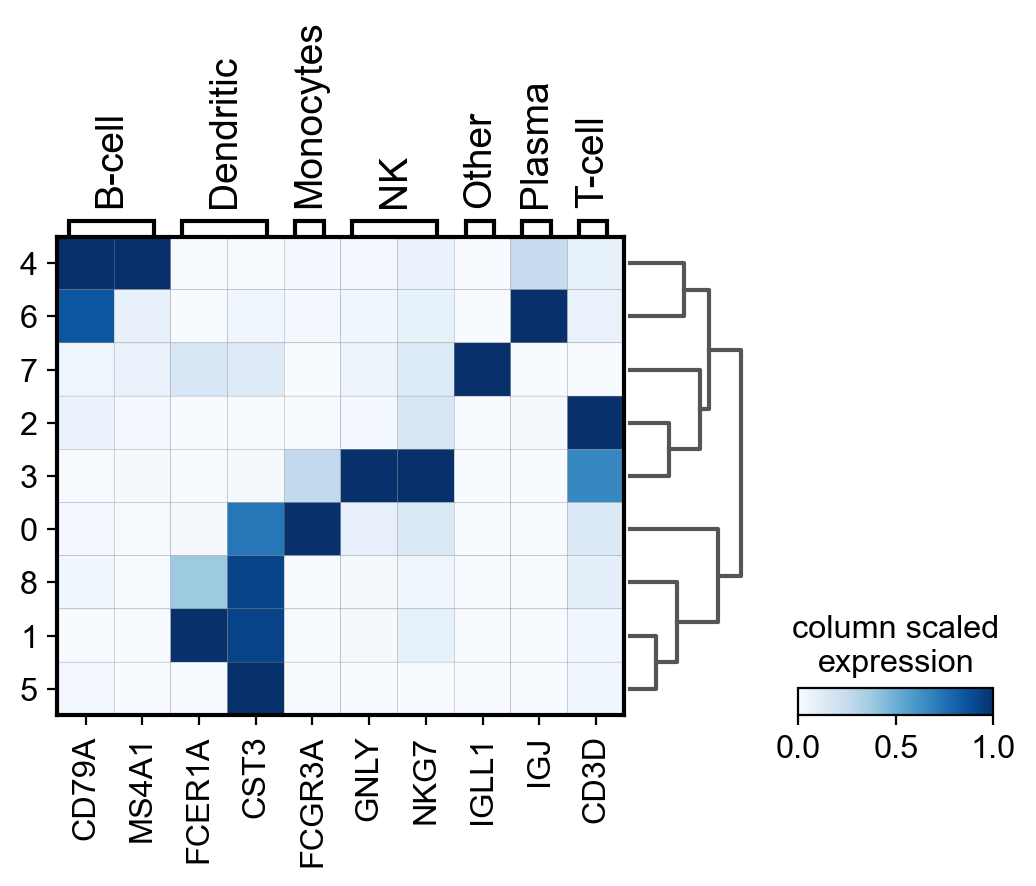

In [26]:
A simple way to visualize the expression of genes is with a matrix plot.

sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')


In [27]:
# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


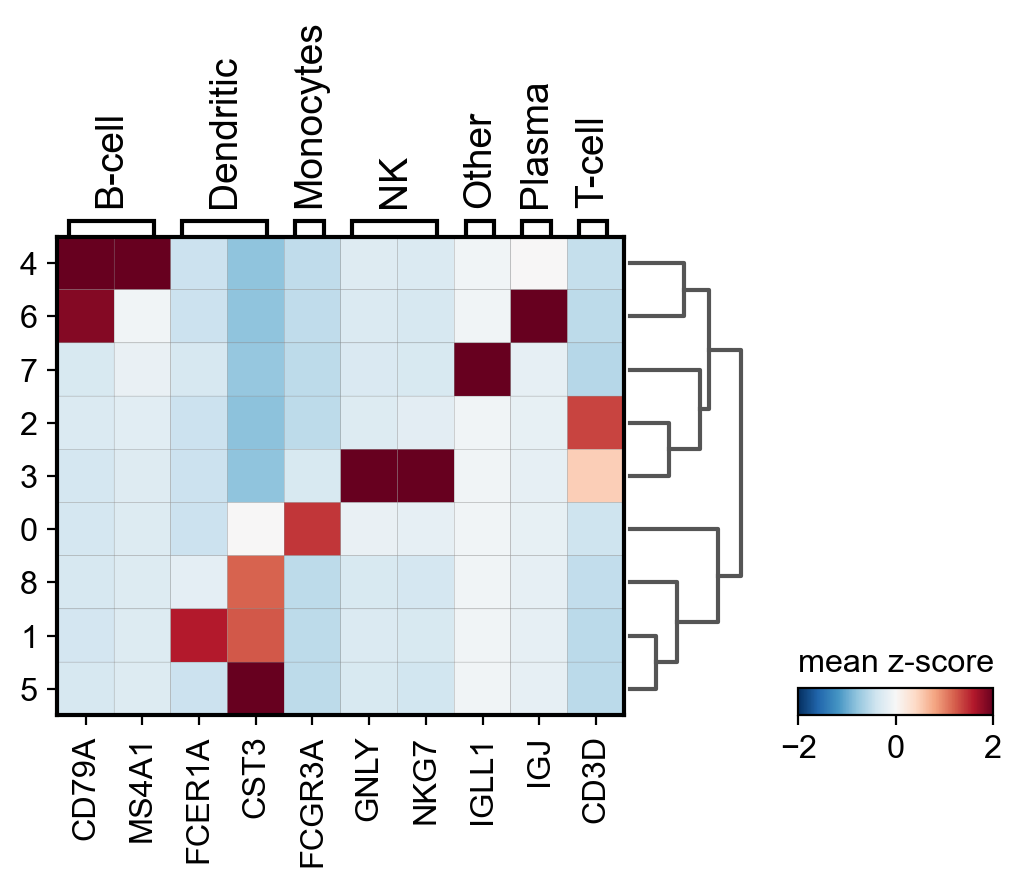

In [28]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')


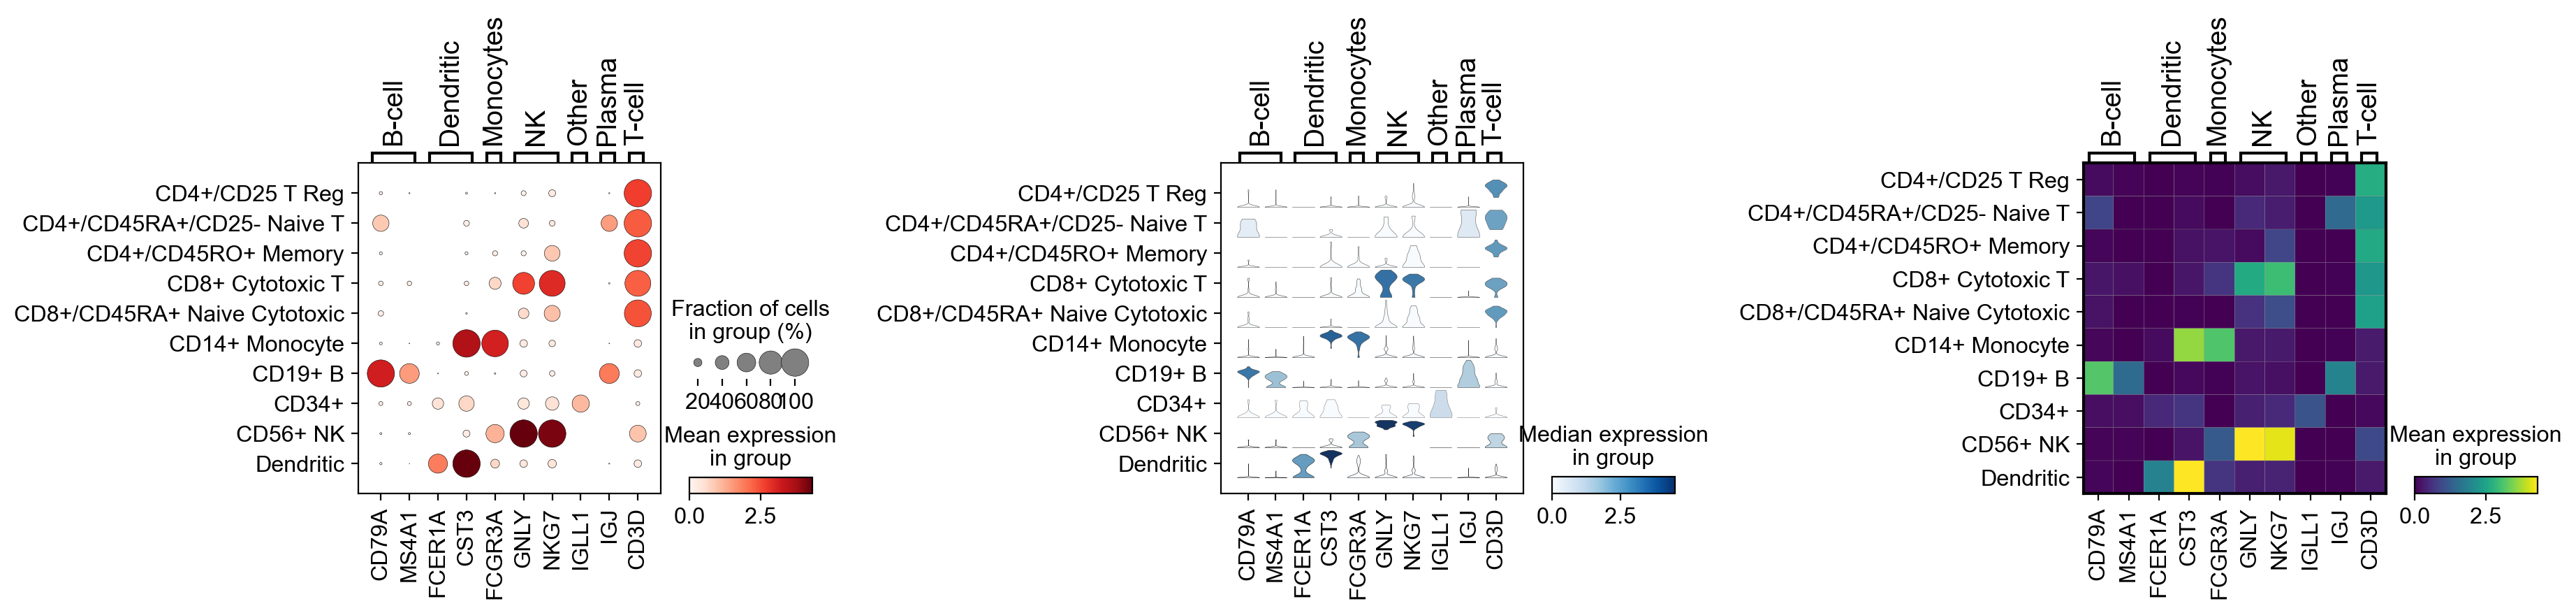

In [29]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4), gridspec_kw={'wspace':0.9})

ax1_dict = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax1, show=False)
ax2_dict = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax2, show=False)
ax3_dict = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax3, show=False, cmap='viridis')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


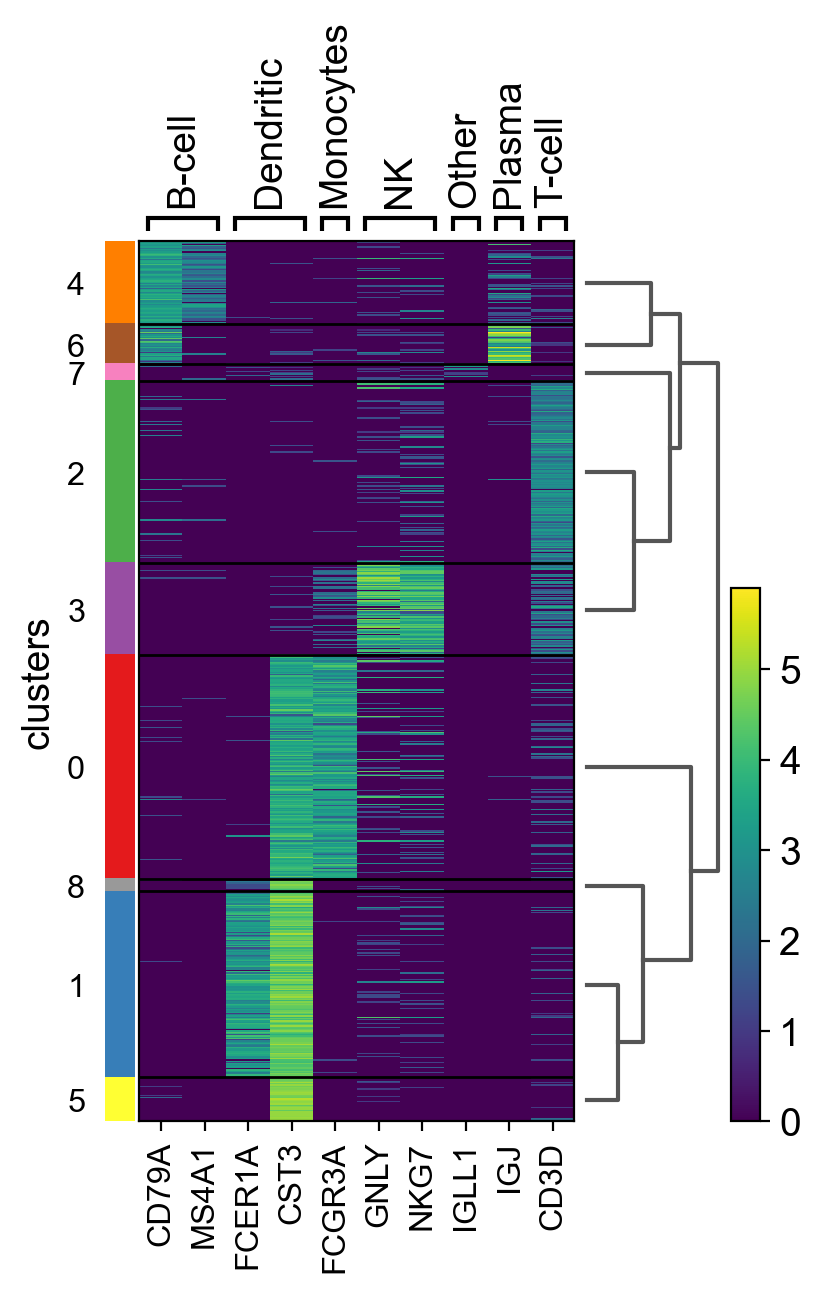

In [30]:
#Heatmaps do not collapse cells as in previous plots. Instead, each cells is shown in a row (or column if swap_axes=True). The groupby information can be added and is shown using the same color code found for sc.pl.umap or any other embedding.
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)


categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


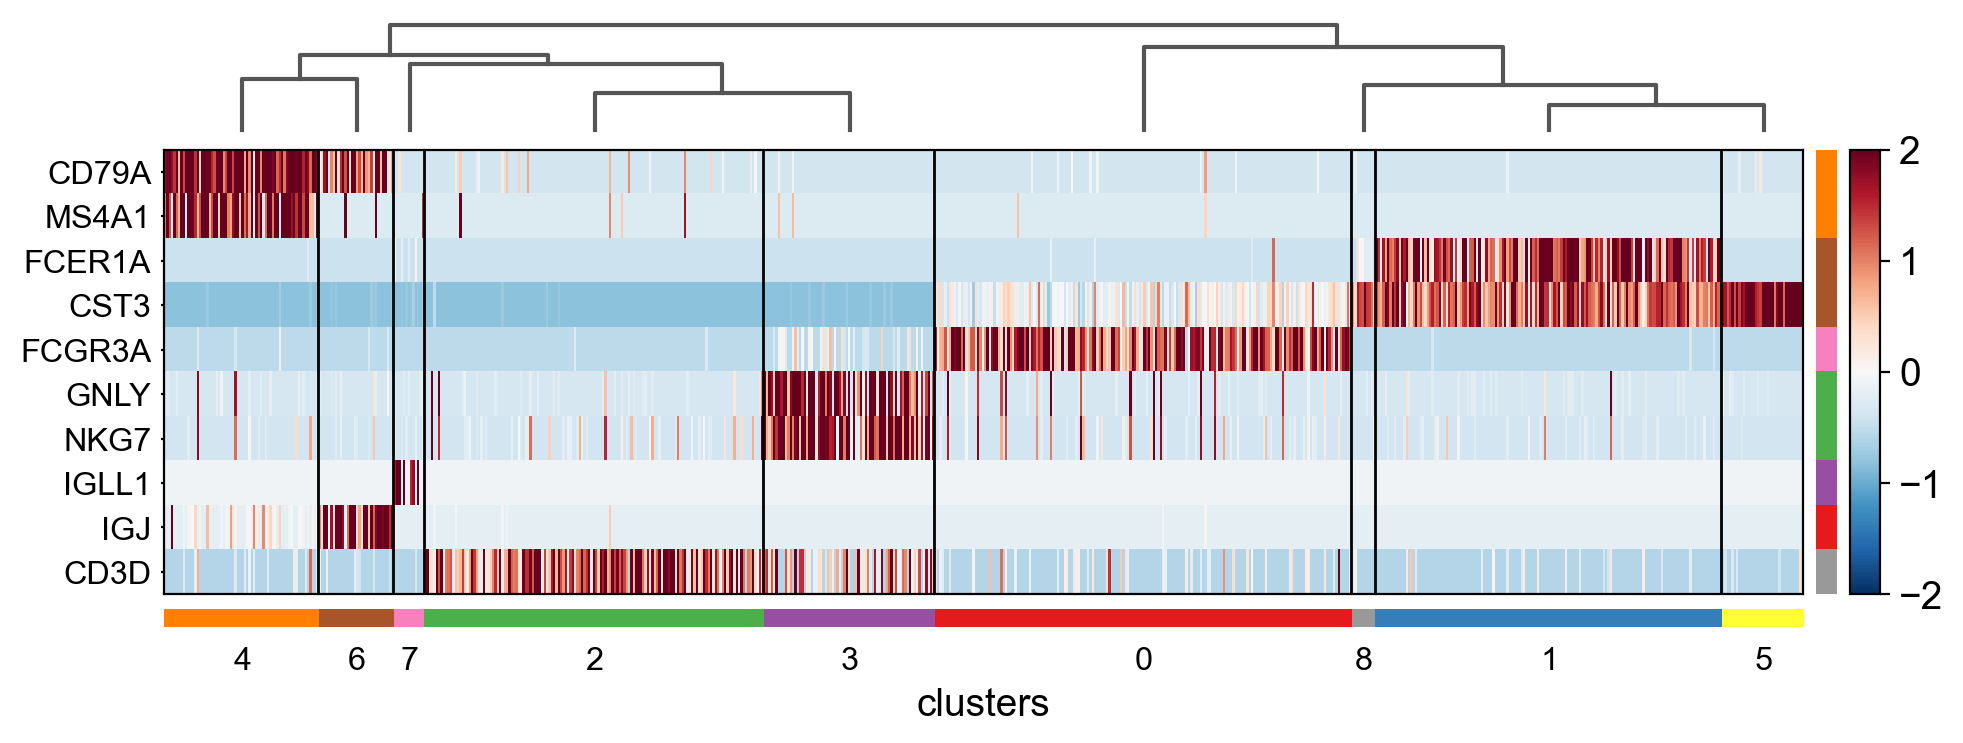

In [36]:
#The heatmap can also be plotted on scaled data. In the next image, similar to the previus matrixplot the min and max had been adjusted and a divergent color map is used.
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))


categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


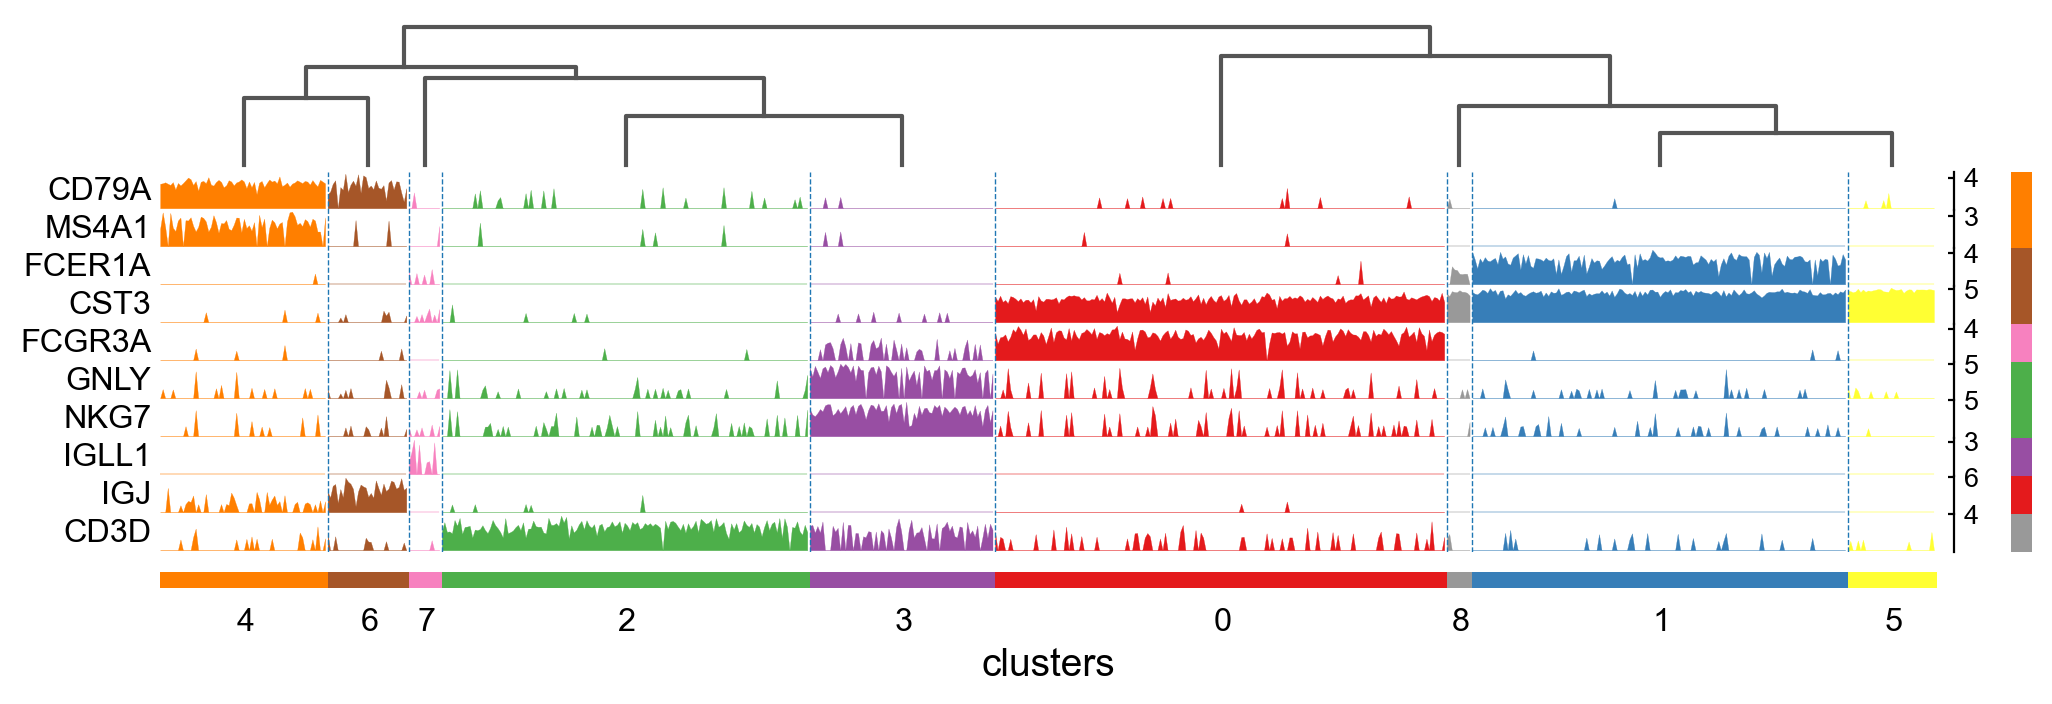

In [31]:
#Tracksplot
#The track plot shows the same information as the heatmap, but, instead of a color scale, the gene expression is represented by height.
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='clusters', dendrogram=True)


In [32]:
sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')


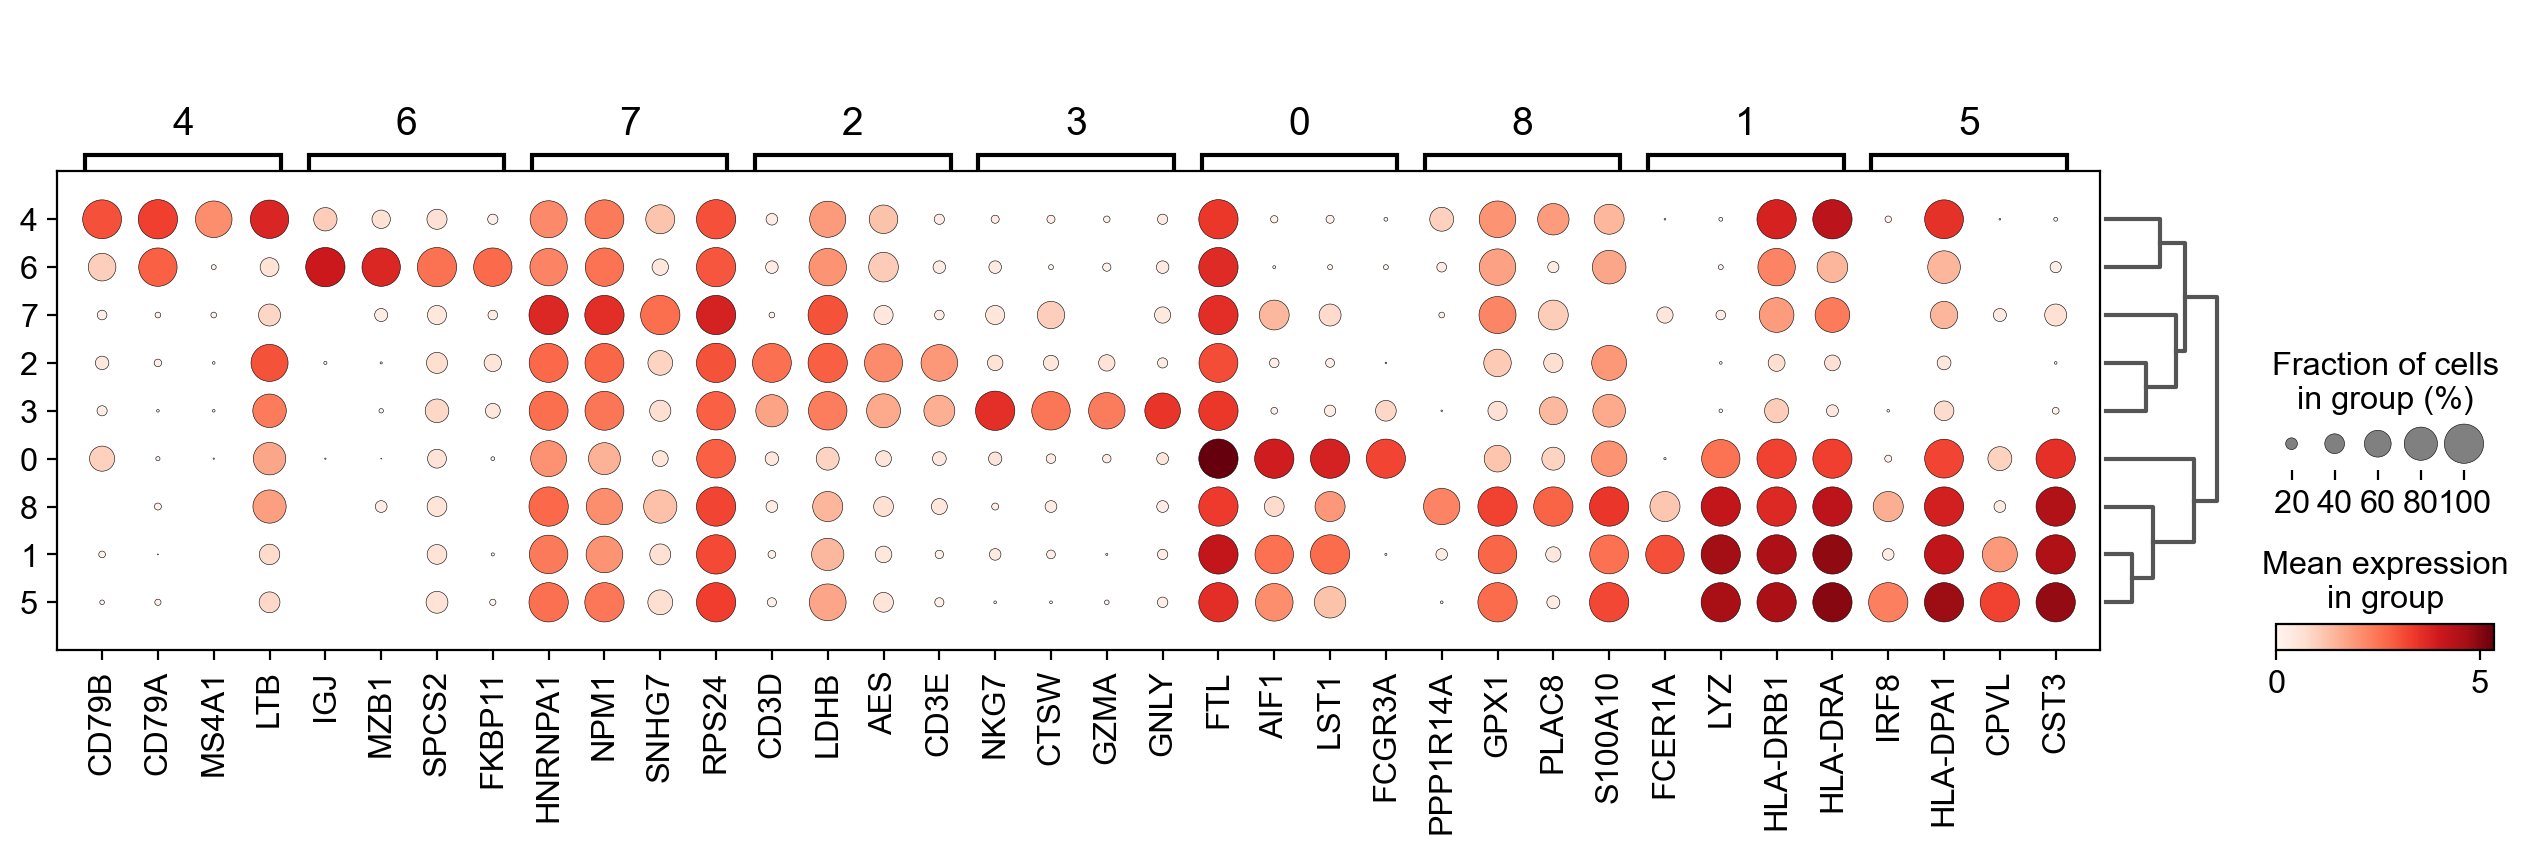

In [33]:
#Visualize marker genes using dotplot
#The dotplot visualization is useful to get an overview of the genes that show differential expression. 
#To make the resulting image more compact we will use n_genes=4 to show only the top 4 scoring genes.
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)


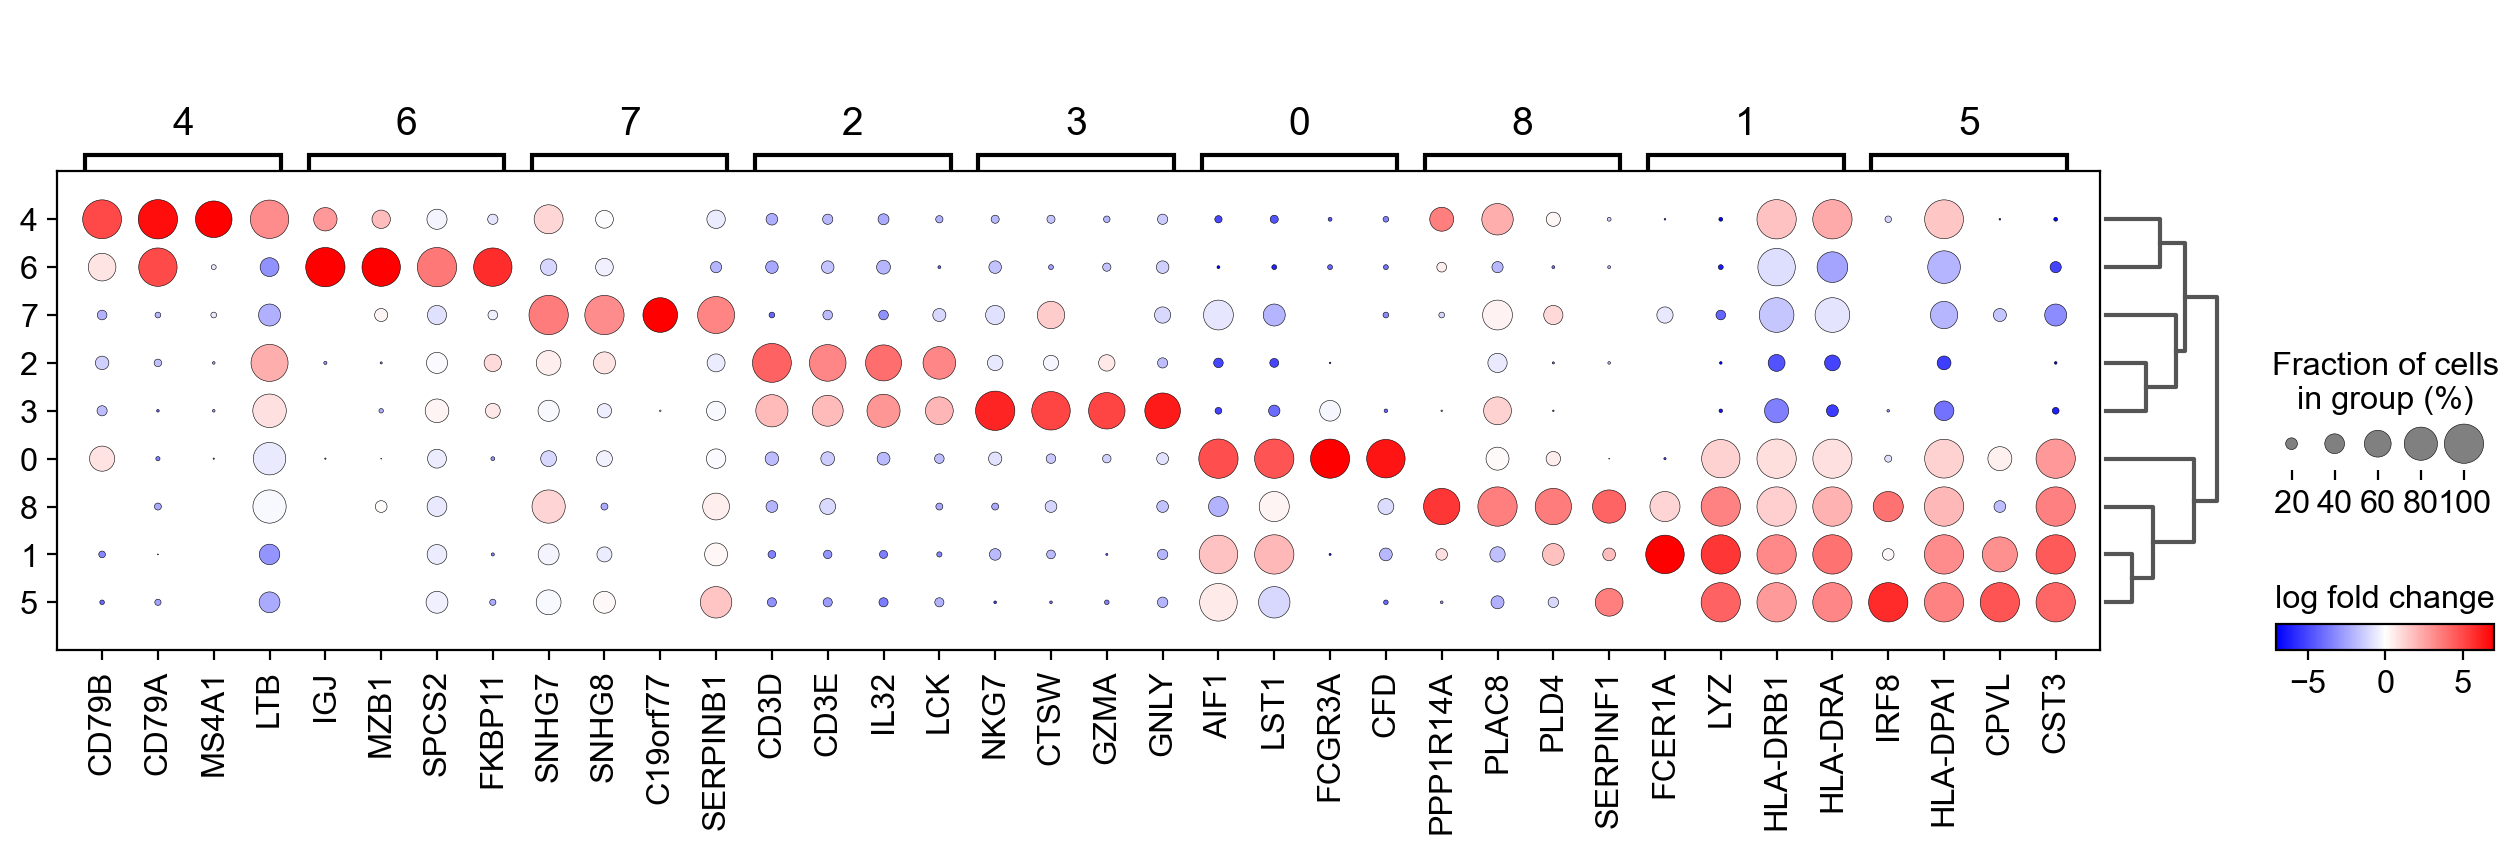

In [34]:
#In order to get a better representation we can plot log fold changes instead of gene expression. Also, we want to focus on genes that have a log fold change >= 3 between the cell type expression and the rest of cells.
#In this case we set values_to_plot='logfoldchanges' and min_logfoldchange=3.
#Because log fold change is a divergent scale we also adjust the min and max to be plotted and use a divergent color map. Notice in the following plot that is rather difficult to distinguish between T-cell populations.
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')


categories: 0, 1, 2, etc.
var_group_labels: 1, 5


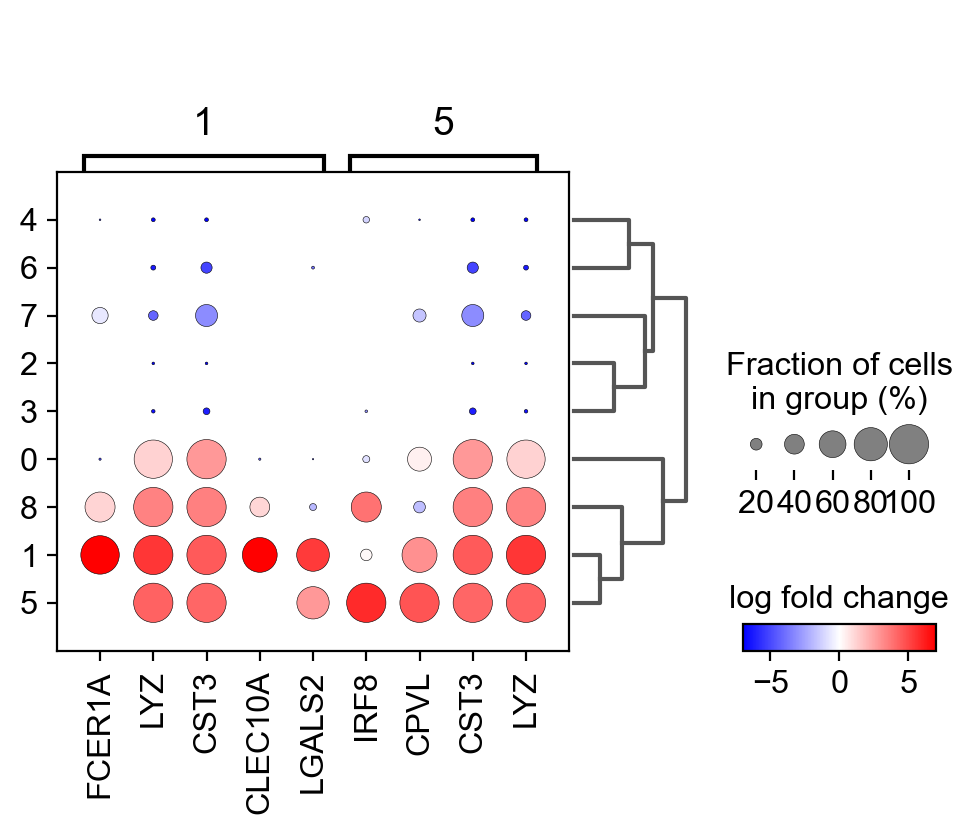

In [35]:
#Next, we use a dotplot focusing only on two groups (the groups option is also available for violin, heatmap and matrix plots). Here, we set n_genes=30 as in this case it will show all the genes that have a min_logfold change=4 up to 30.
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=30, values_to_plot='logfoldchanges', min_logfoldchange=4, vmax=7, vmin=-7, cmap='bwr', groups=['1', '5'])


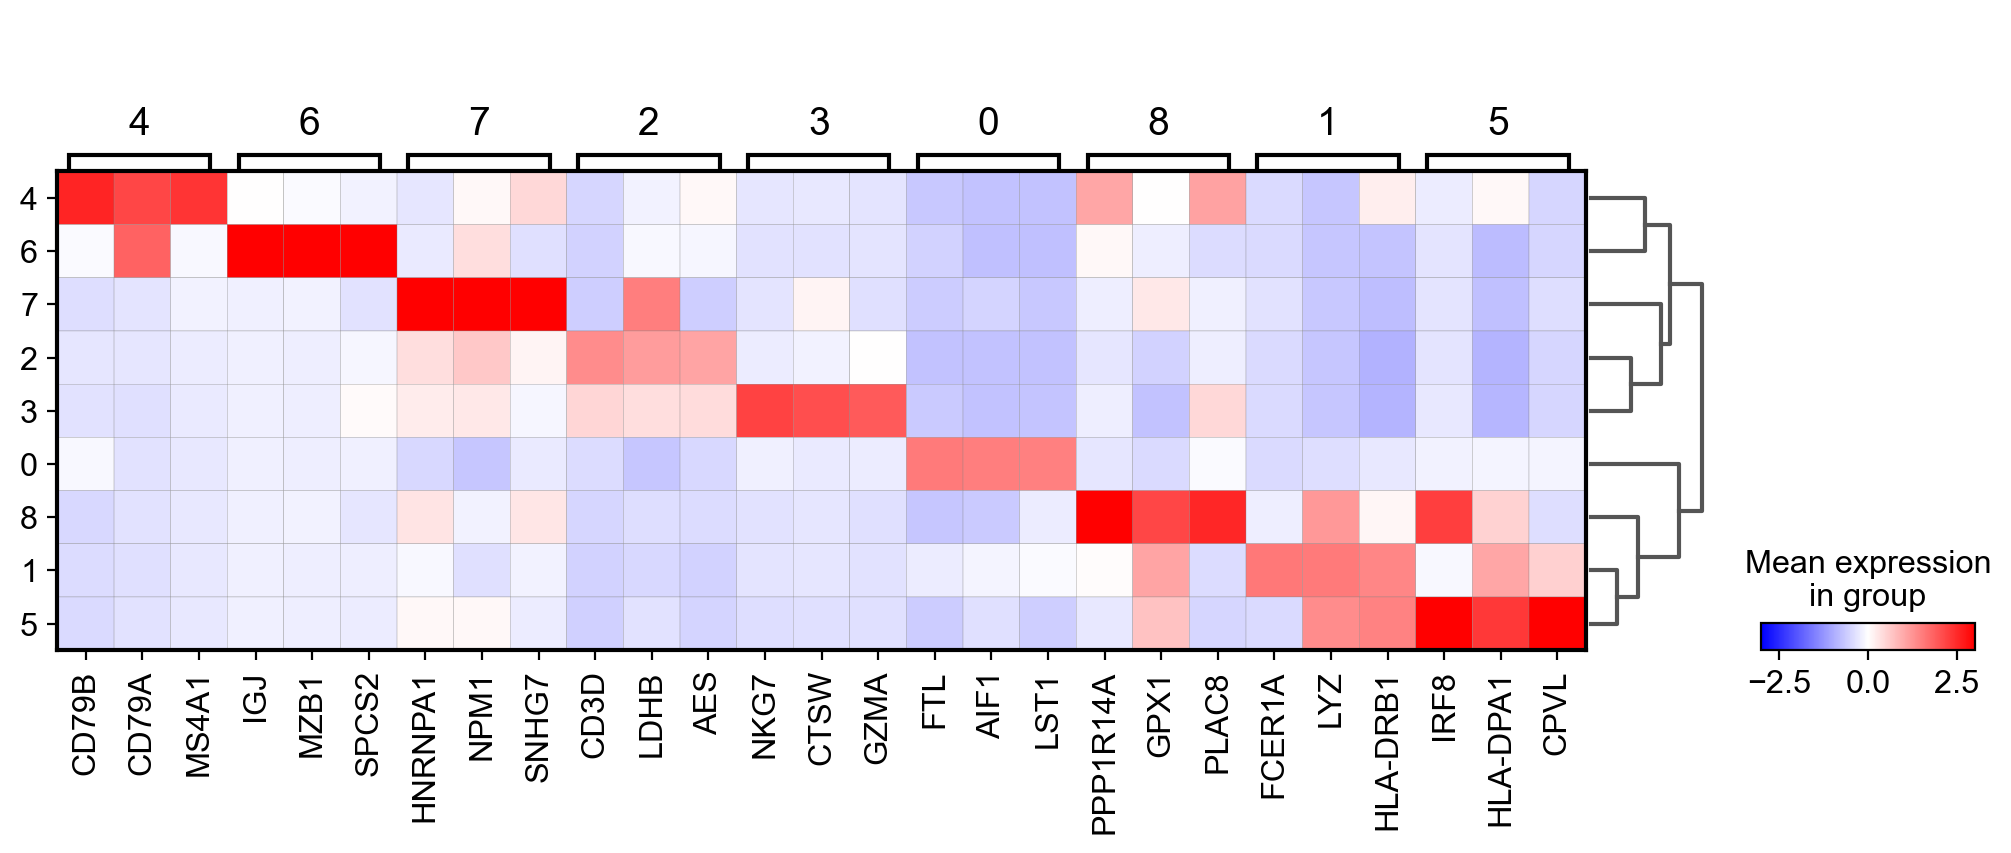

In [40]:
#Visualize marker genes using matrixplot
#For the following plot the we use the previously computed ‘scaled’ values (stored in layer scaled) and use a divergent color map.
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr', layer='scaled')


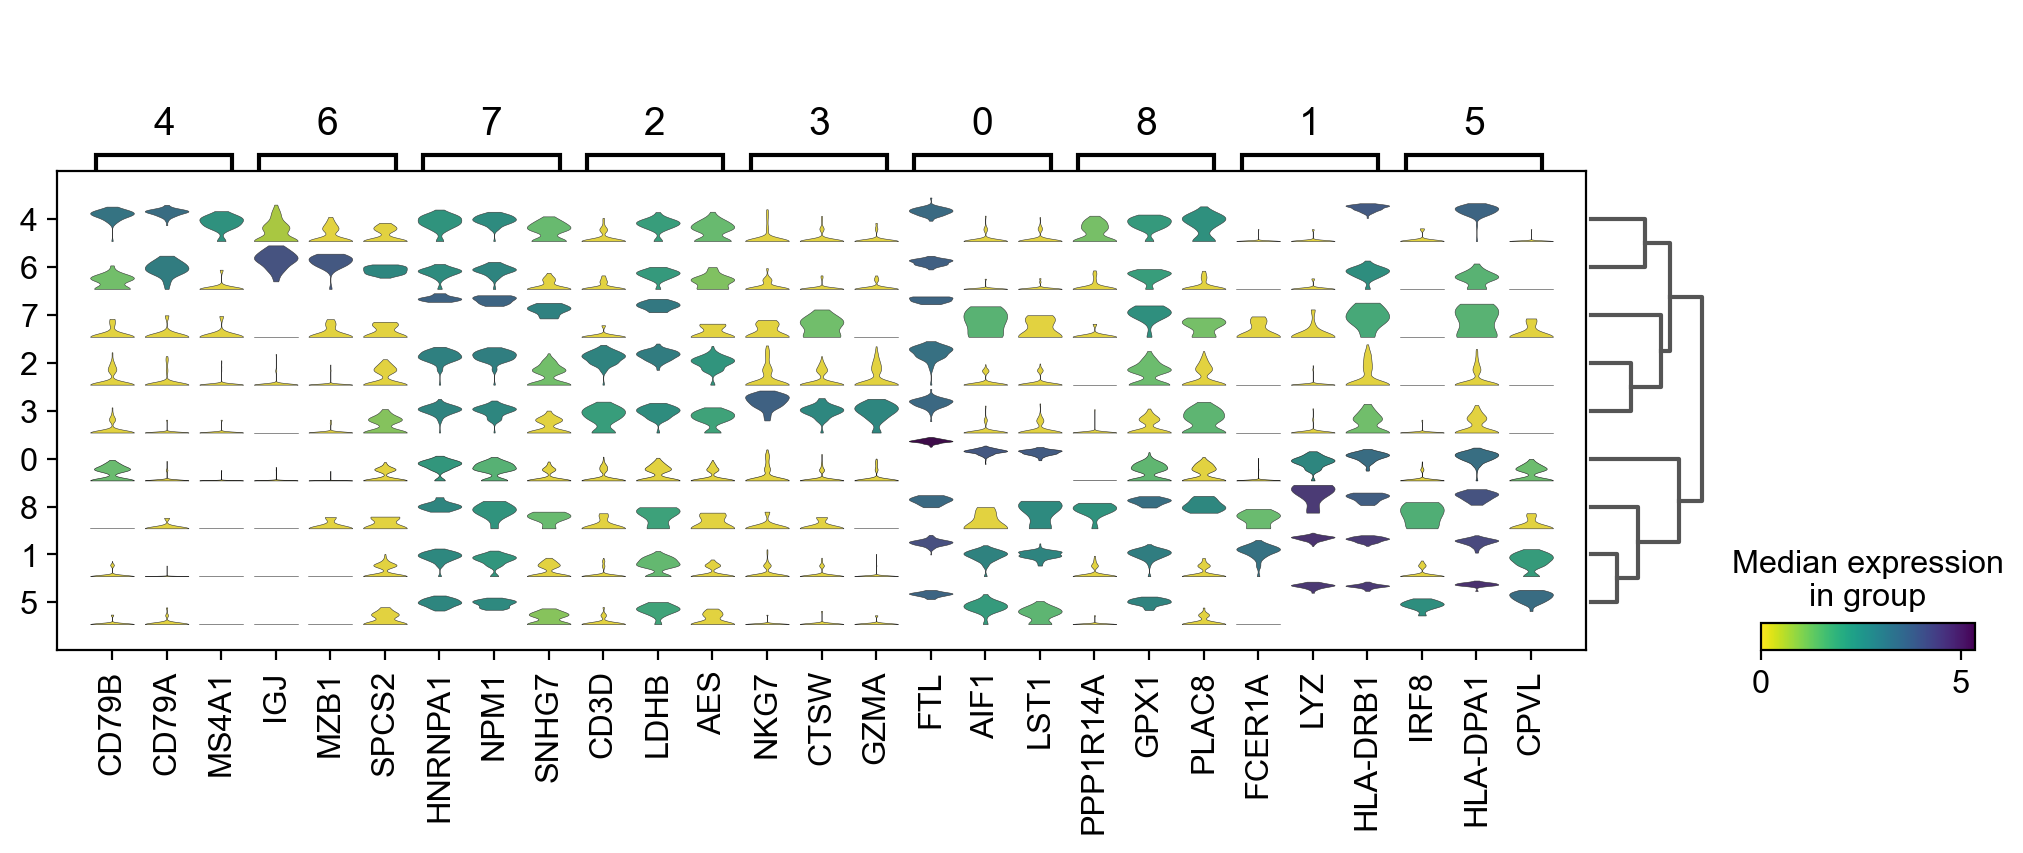

In [41]:
#Visualize marker genes using stacked violin
sc.pl.rank_genes_groups_stacked_violin(pbmc, n_genes=3, cmap='viridis_r')


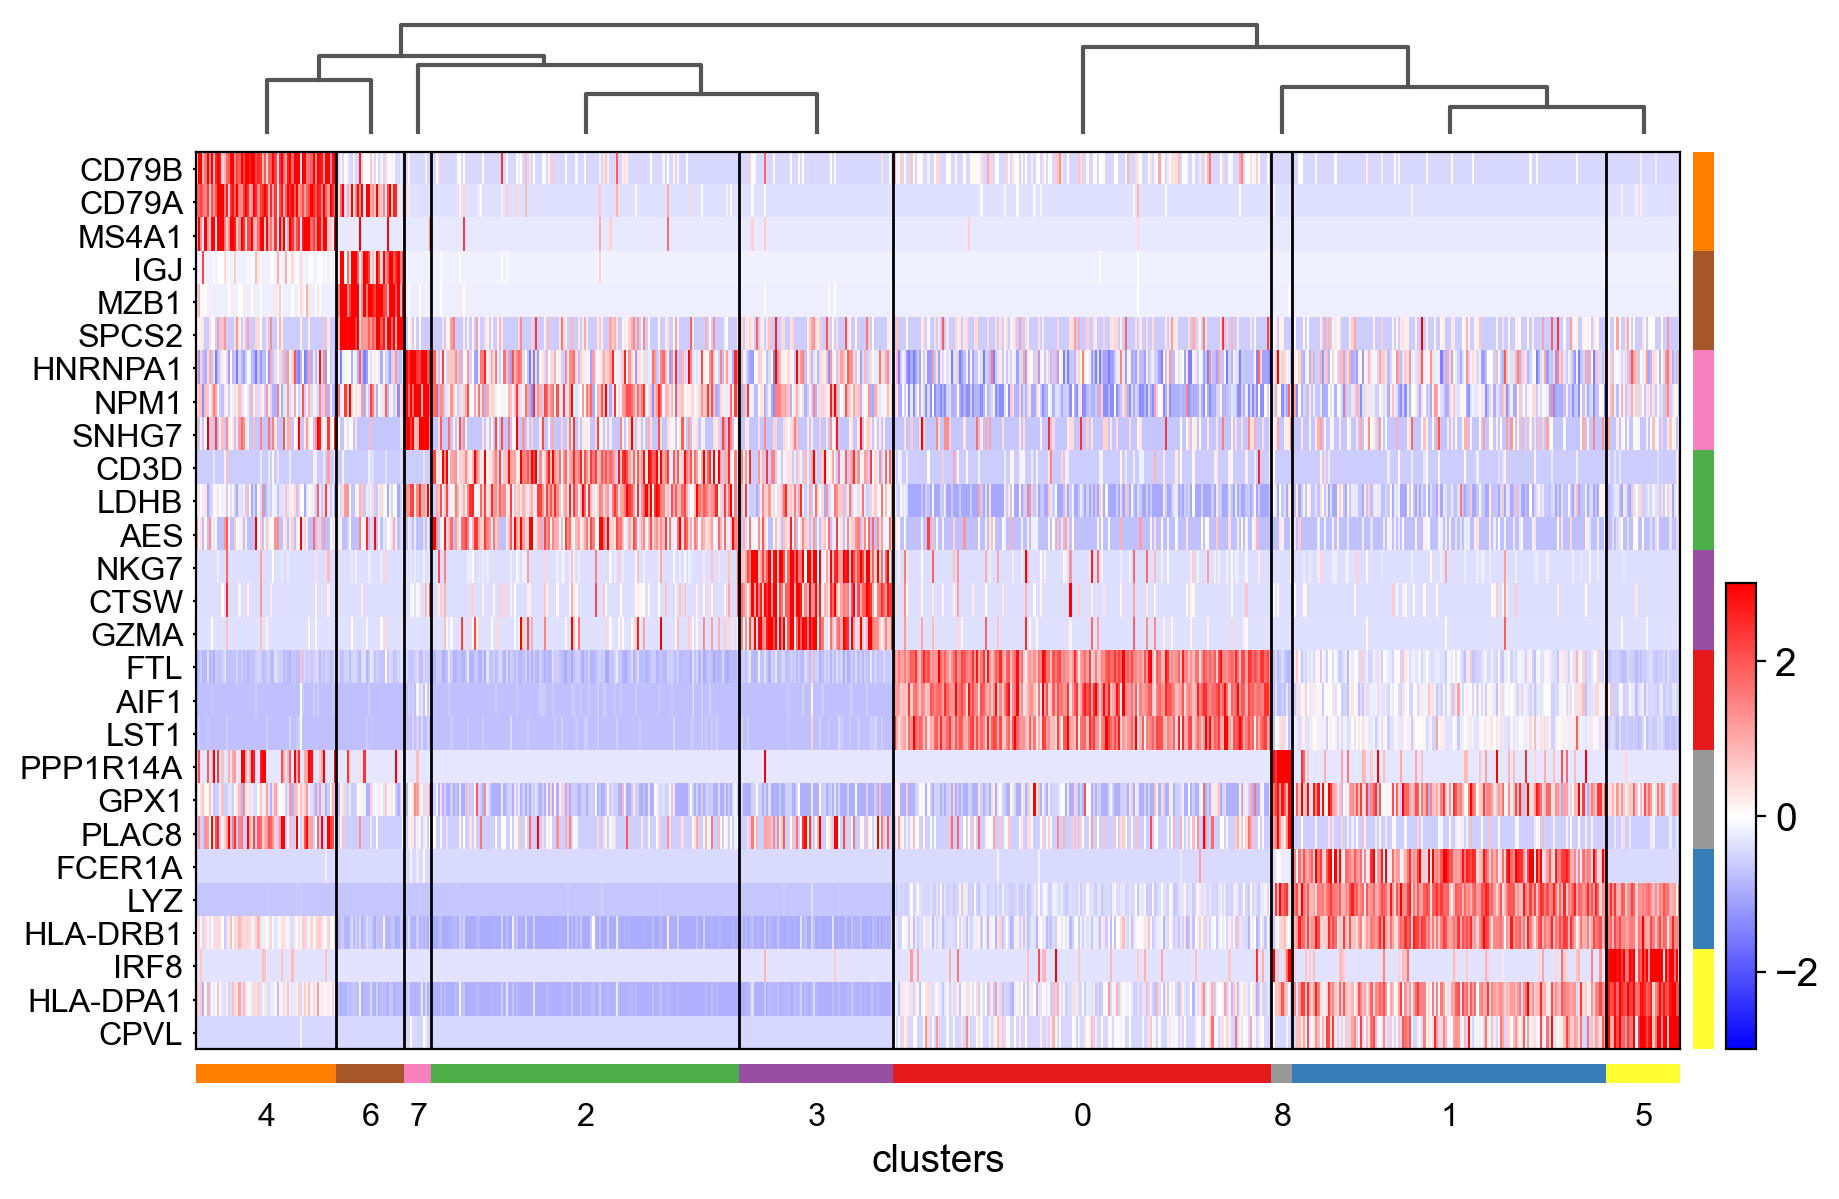

In [42]:
#Visualize marker genes using heatmap
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);


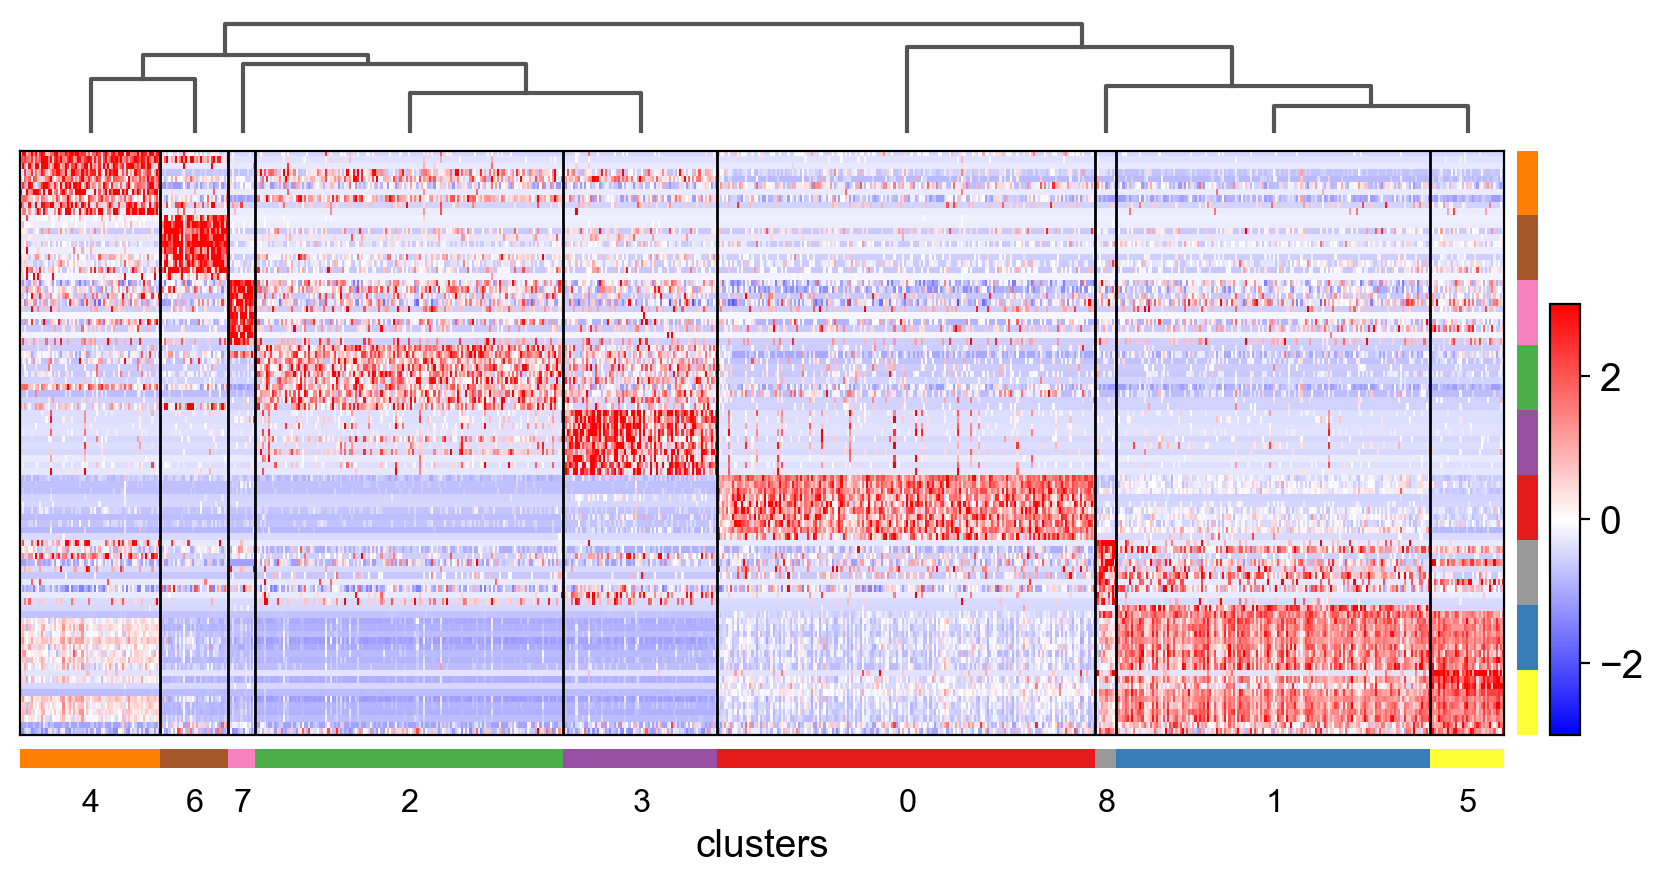

In [43]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

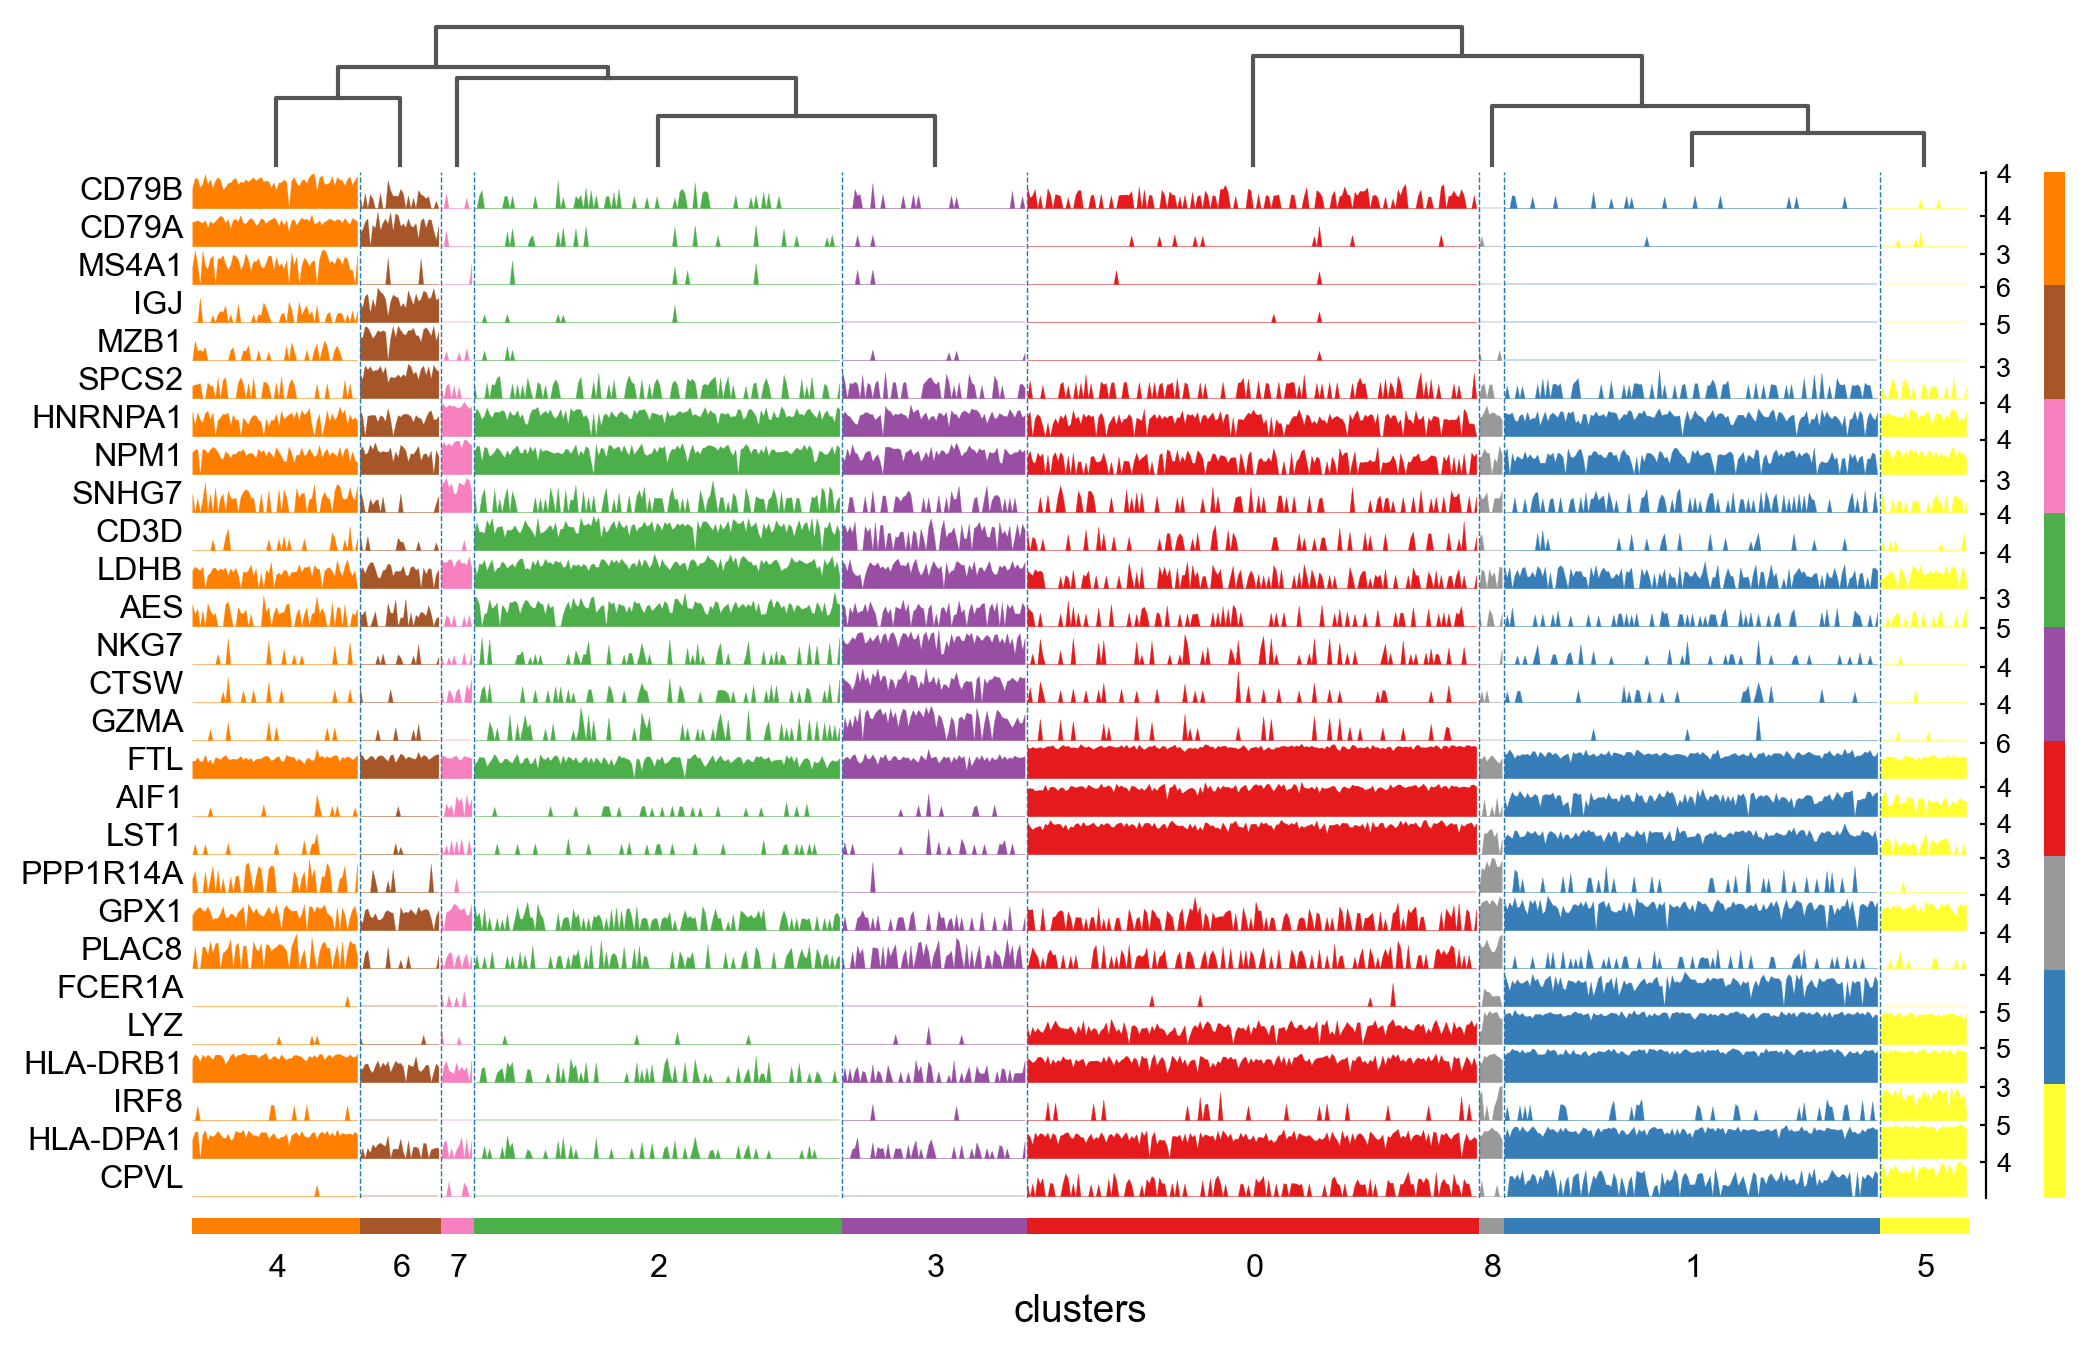

In [44]:
#Visualize marker genes using tracksplot
sc.pl.rank_genes_groups_tracksplot(pbmc, n_genes=3)


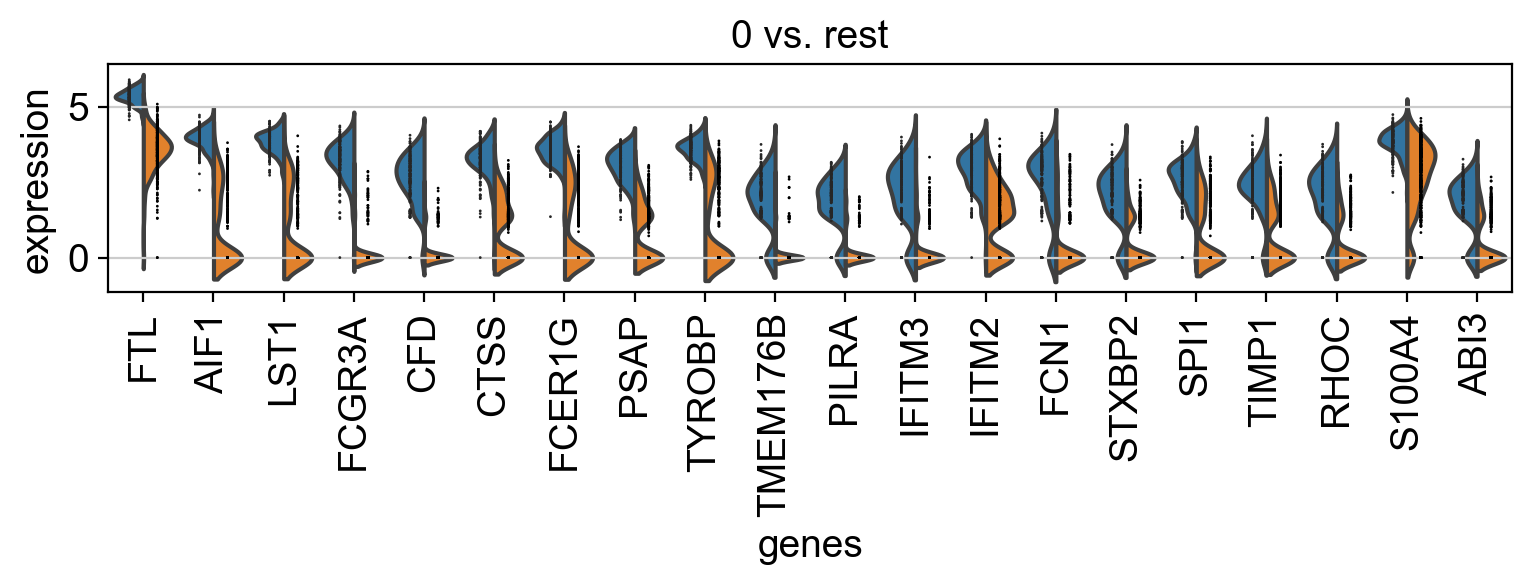

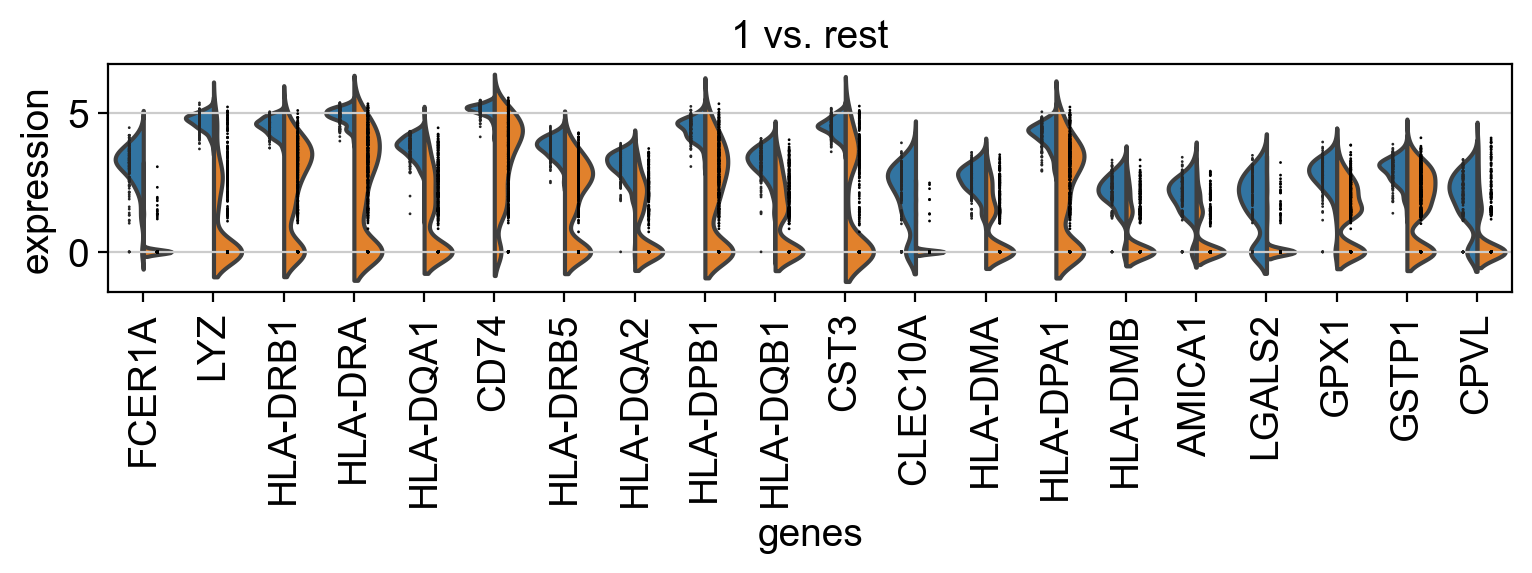

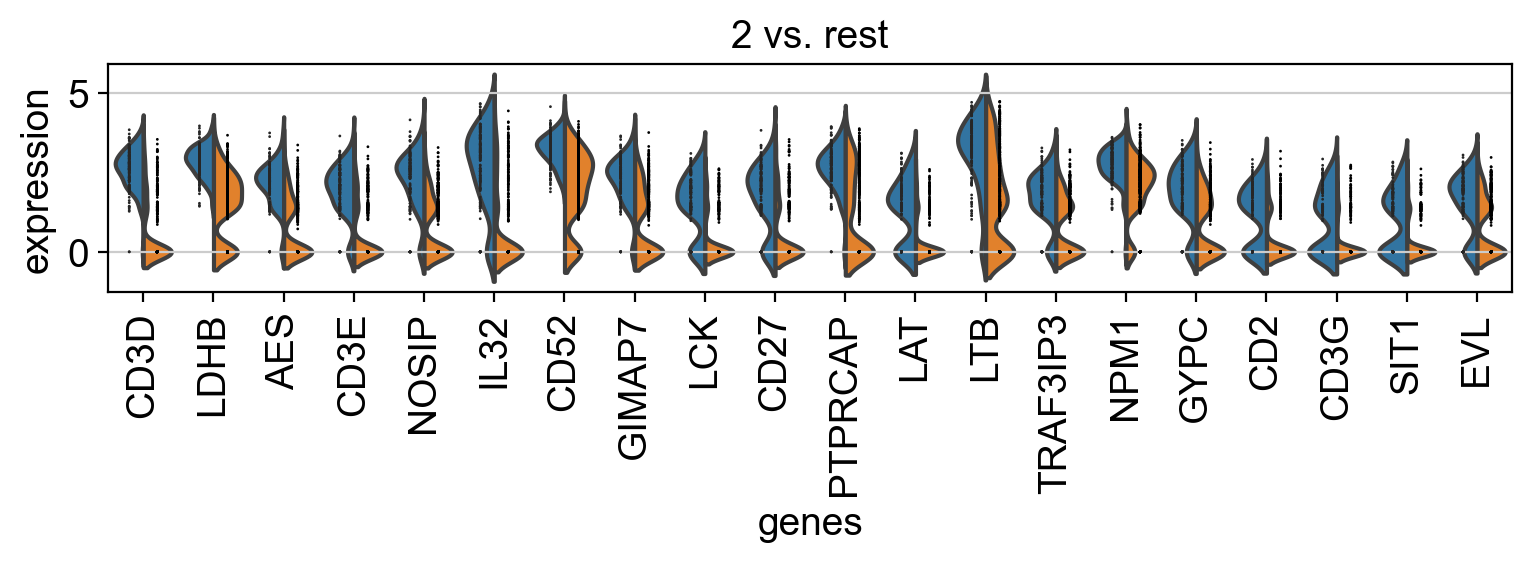

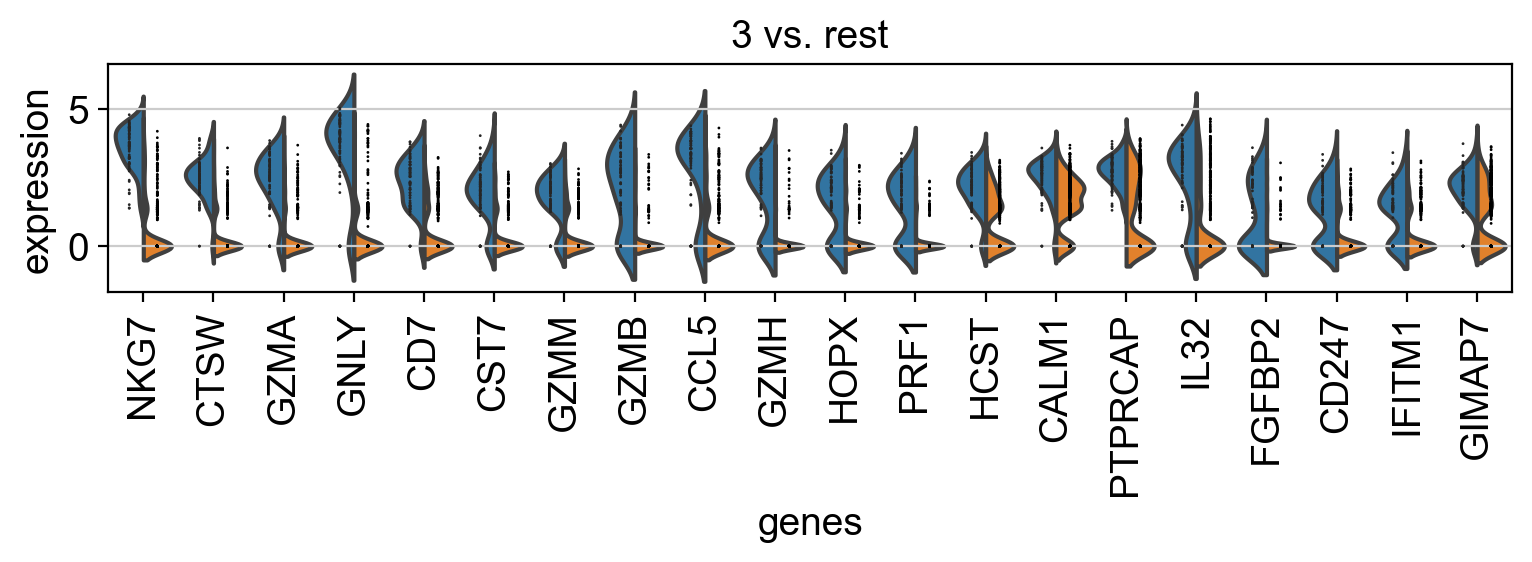

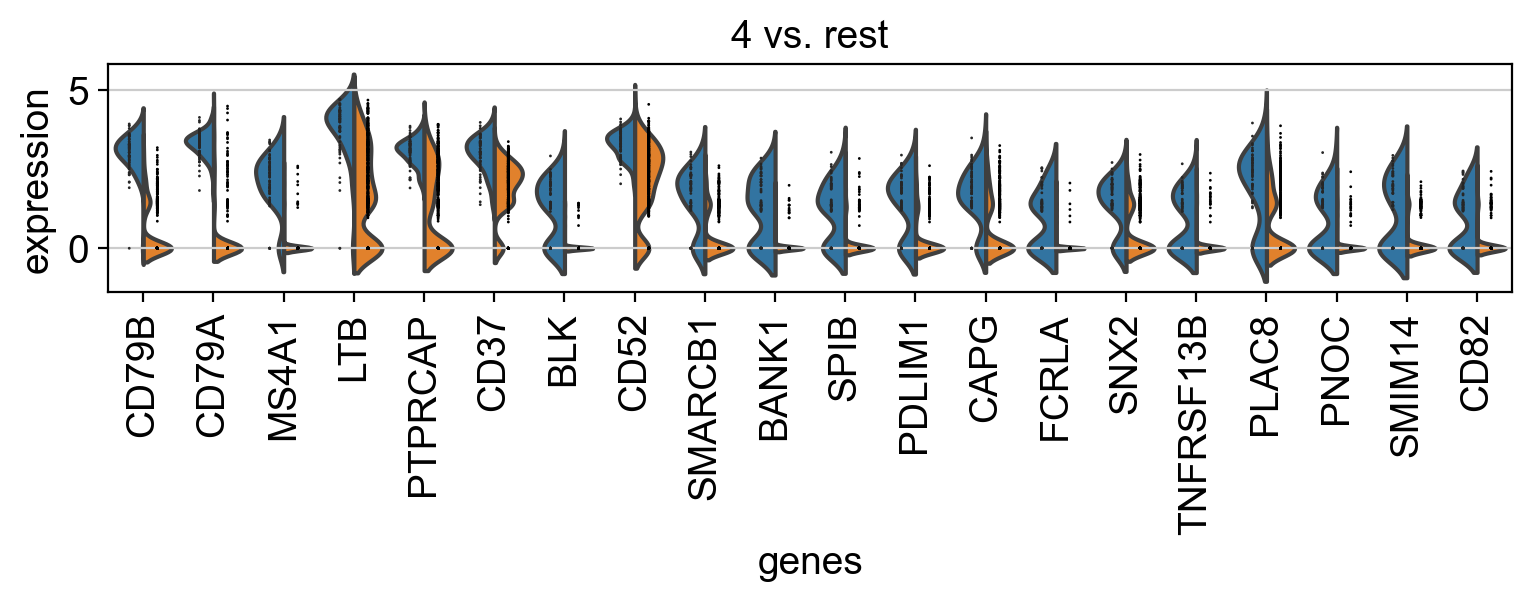

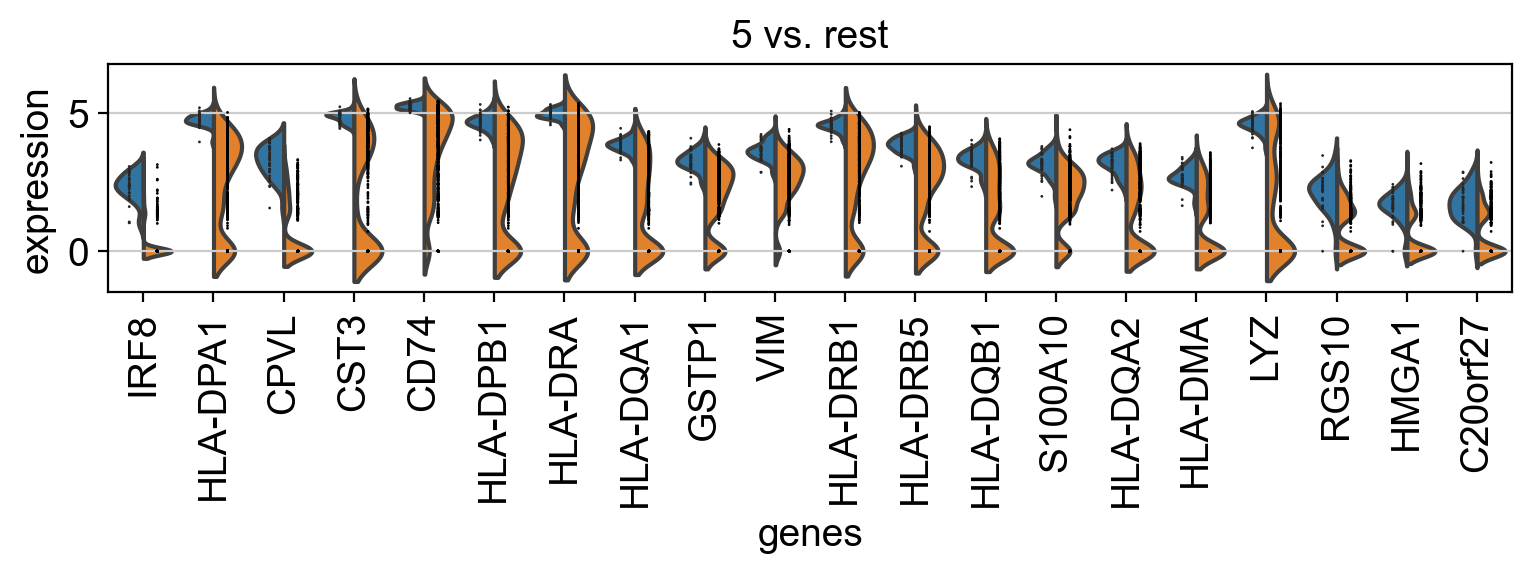

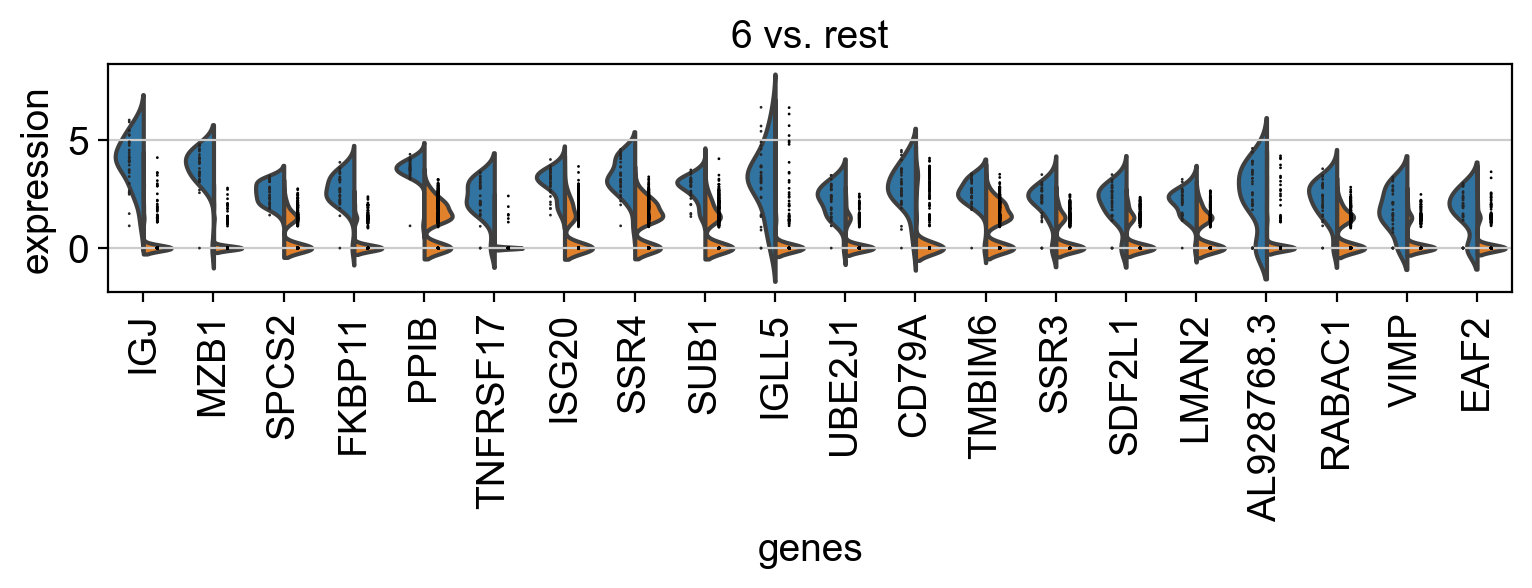

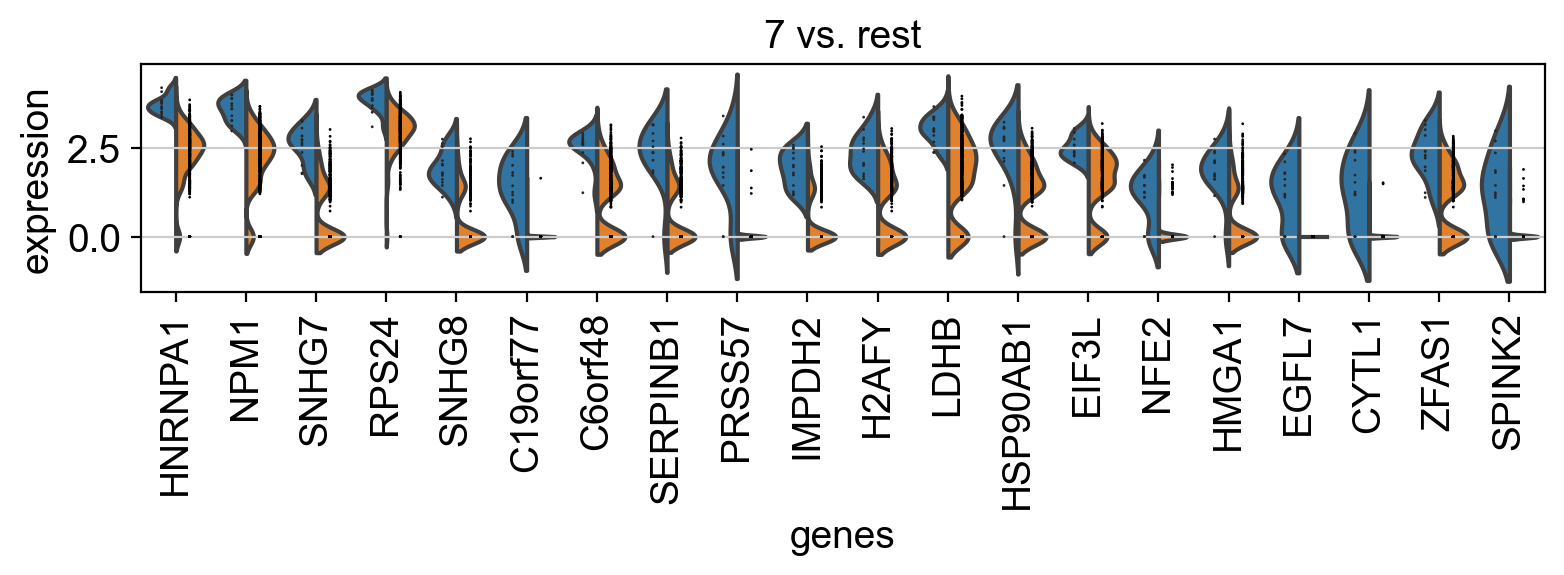

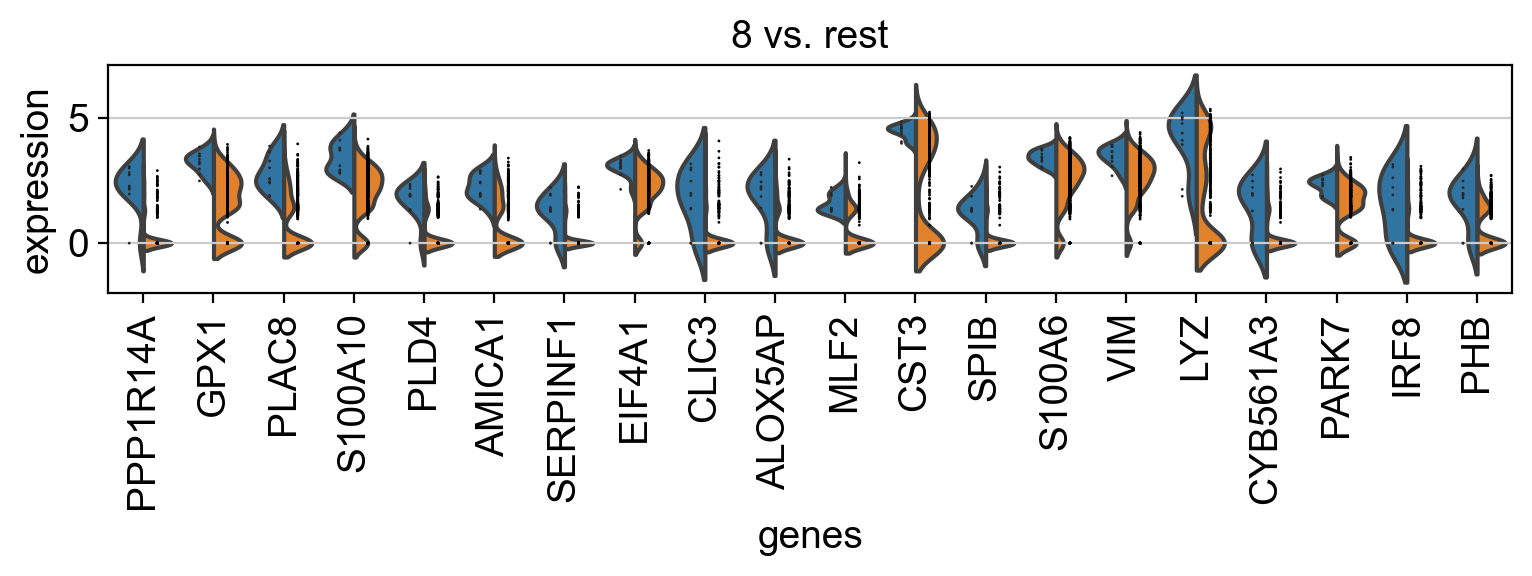

In [47]:
#Compariwith rc_context({'figure.figsize': (9, 1.5)}):
with rc_context({'figure.figsize': (9, 1.5)}):
     sc.pl.rank_genes_groups_violin(pbmc, n_genes=20, jitter=False)  

In [49]:
# compute hierarchical clustering using PCs (several distance metrics and linkage methods are available).
sc.tl.dendrogram(pbmc, 'bulk_labels')

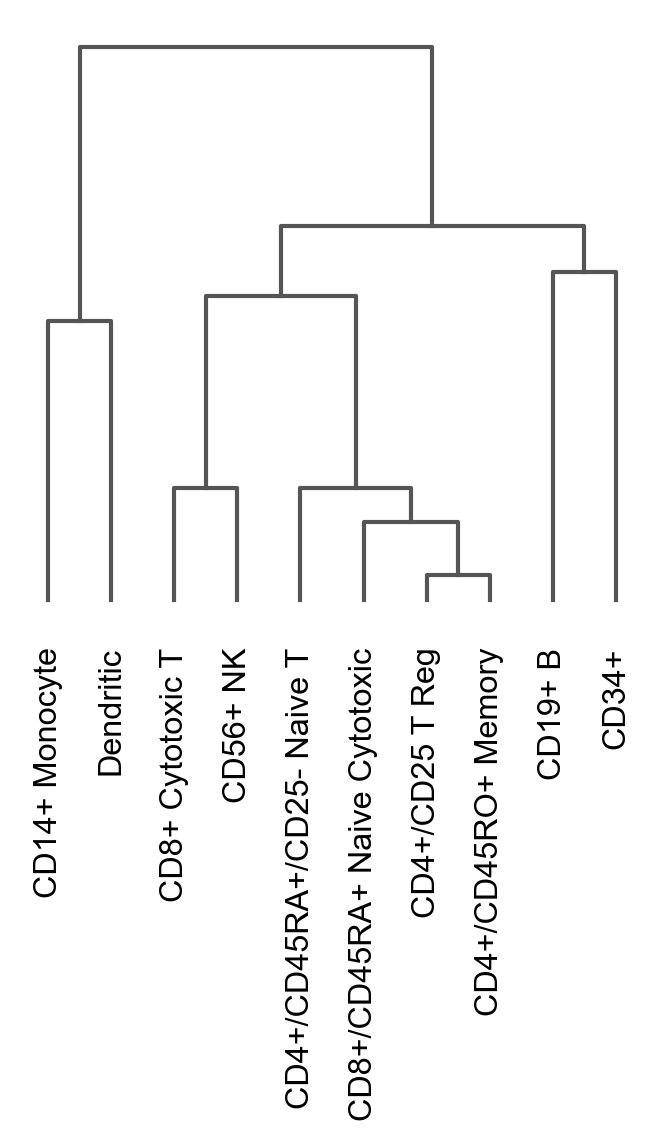

In [50]:
ax = sc.pl.dendrogram(pbmc, 'bulk_labels')


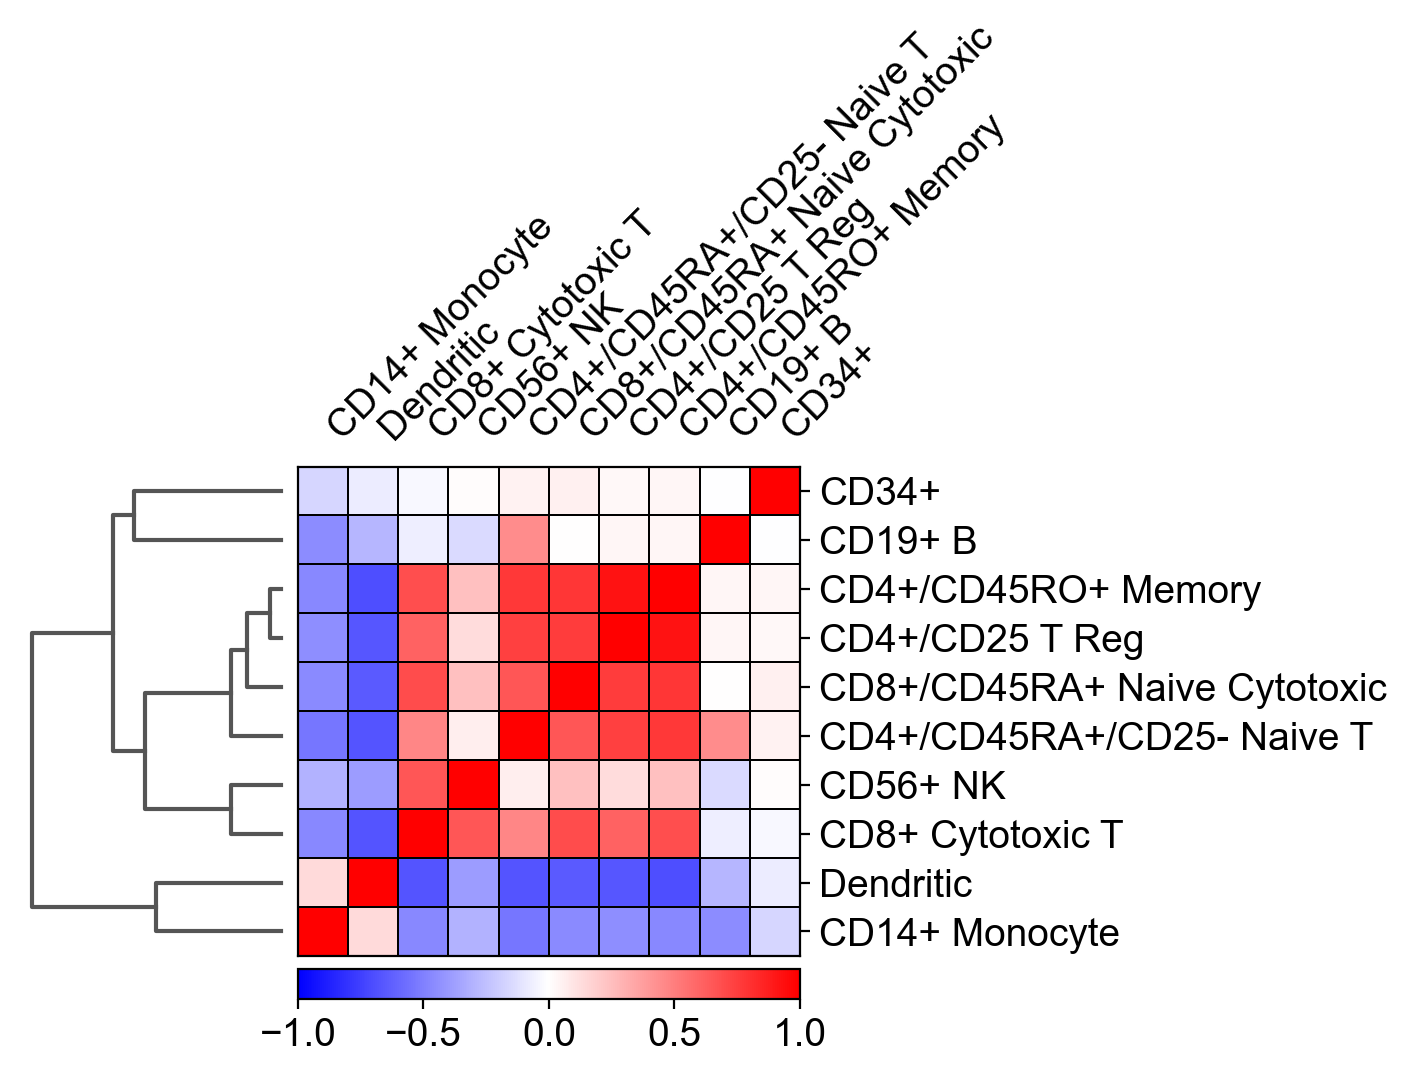

In [51]:
#Plot correlation
#Together with the dendrogram it is possible to plot the correlation (by default ‘pearson’) of the categories.
ax = sc.pl.correlation_matrix(pbmc, 'bulk_labels', figsize=(5,3.5))
